#### Database Link : https://www.kaggle.com/mlg-ulb/creditcardfraud

#### info: The data represents credit card transactions that occured over 2 days in september 2013 by European cardholders. Due to privacy, all details concerning the cardholders have been anonymized via PCA transformation. In total there is 28 principal components of these anonymized features, Time in seconds, Amount in Euros (assumed because of the origine which is Europe) and finally our Variable Of interrest witch is Class.
#### Class will take the value '0' if normal and '1' if fraudulant

# Project Plan

## - Database analysis , rescaling and Train_Test_Split

## - Building models and comparing (Before and After OverSamling Train set using SMOTE): 
###              1- Using GridSearch we select the best parameters for Decision Tree, Random Forest and Logistic                                 Regression
###              2- Buiding the neural networks and the Bagging classifier
###              3- Using evaluation, get_log_function, and get_rf_importance Functions to Report our Models
###              4-Rank the models (With and without SMOTE apart) according to their F1-score and AUC

## - Rank ALL the created models 


# Libraries

In [1]:
import numpy as np
import pandas as pd # used to read csv file
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl #to save and load files (need yaml for neural networks)

In [2]:
#function to save files
def save_fitted_model(filename, model):
    outfile = open(filename,'wb')
    pkl.dump(model,outfile)
    outfile.close()

In [3]:
# function to load files
def load_models(filename):
    infile = open(filename,'rb')
    model = pkl.load(infile)
    infile.close()
    return model

# Loading and Exploring

In [4]:
#imprting our dataframe from local machine
df = pd.read_csv('creditcard.csv')

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe()
#we can see from the mean of variable Class that only 0.001727
#of the transactions are fraudulant

#in 2 days we have 172800 seconds ^^

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
#vizualise the numbers of normal and fraud transactions
normal_trans = len(df[df.Class == 0])
fraud_trans = len(df[df.Class == 1])

print('Normal : ', normal_trans)
print('Fraud : ', fraud_trans)

print('percentage of FRAUD transactions = %.3f' %(fraud_trans*100/len(df)) )

Normal :  284315
Fraud :  492
percentage of FRAUD transactions = 0.173


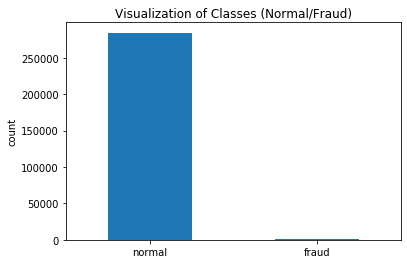

In [9]:
#Visualization of Class destribution

labs = ['normal', 'fraud']
class_count = df['Class'].value_counts()
class_count.plot(kind = "bar", rot= 0)
plt.title("Visualization of Classes (Normal/Fraud)")
plt.ylabel("count")
plt.xticks(range(2), labs)
plt.show()

## Fraudulous cases analysis

In [10]:
df_fraud = df[df['Class'] == 1] #dataset containing only fraud cases
len(df_fraud)
df_fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


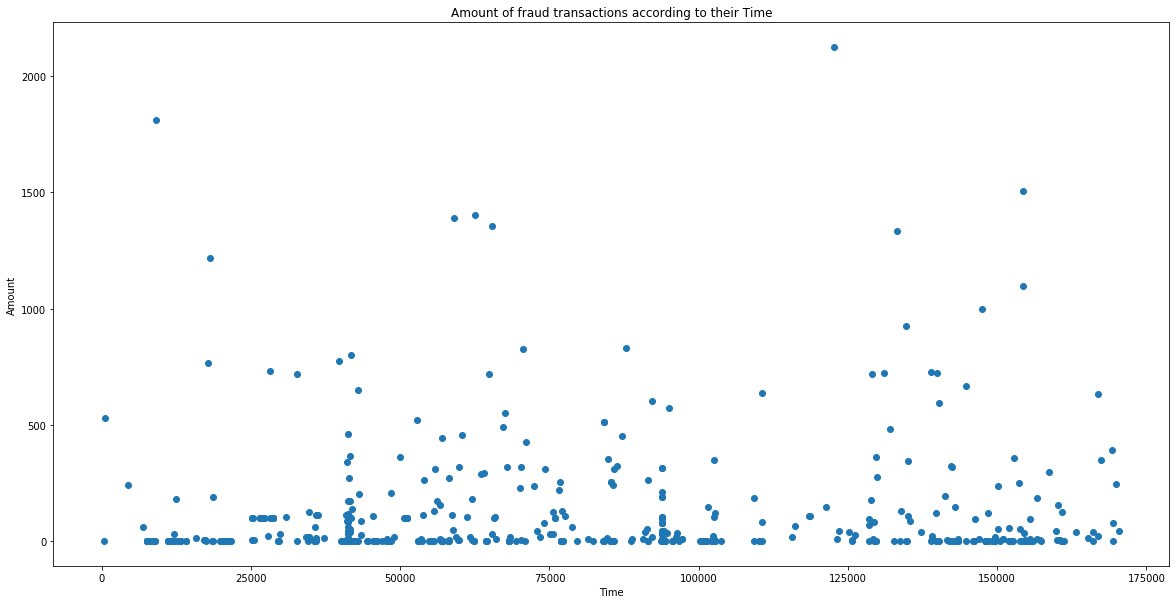

In [11]:
plt.figure(figsize=(20,10))
plt.scatter(df_fraud['Time'], df_fraud['Amount'])
plt.title('Amount of fraud transactions according to their Time')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

In [12]:
#Checking for outlayers: Big amount
l=[]
for amount in df_fraud['Amount']:
    if amount > 1000:
        l.append(amount)
        
print('there are '+ str(len(l)) + ' big transactions: ')
print(l)

there are 9 big transactions: 
[1809.68, 1218.89, 1389.56, 1402.16, 1354.25, 2125.87, 1335.0, 1504.93, 1096.99]


## Correlation

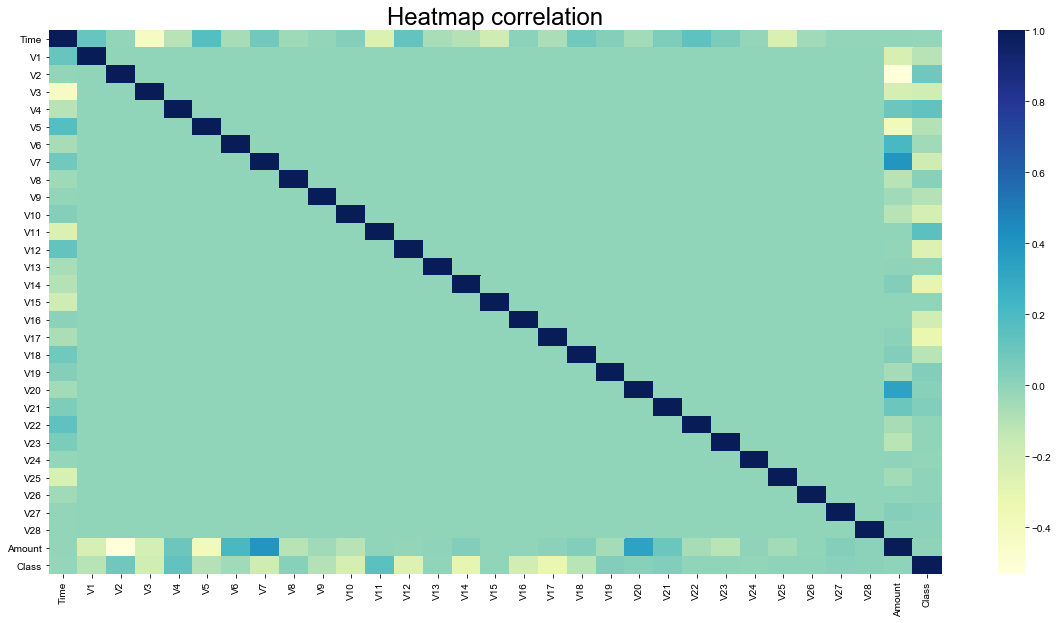

In [13]:
#Analysing the correlation between variables
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap=('YlGnBu'))
sns.set(font_scale=2, style='white')

plt.title('Heatmap correlation')
plt.show()

In [14]:
#Corrolation coeffs per feauture in relation to Class

class_corr = pd.DataFrame(df.corr()['Class'])
class_corr = np.abs(class_corr).sort_values(by='Class', ascending = False)

In [15]:
class_corr

,Class
Class,1.000000
V17,0.326481
V14,0.302544
V12,0.260593
V10,0.216883
V16,0.196539
V3,0.192961
V7,0.187257
V11,0.154876
V4,0.133447


# Data Preparation and Models

In [16]:
#Classification libraries imports + Confusion matrix

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split as tts

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import GridSearchCV as GSCV
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

mycallbacks = [EarlyStopping(monitor='val_loss', patience=5)]

from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve, f1_score, accuracy_score,  roc_curve, auc

## Scaling

In [18]:
# rescaling Time and Amount to values between -1 & 1

rs = RobustScaler()

df['scaled_amount'] = rs.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rs.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time', 'Amount'], axis=1, inplace=True)

amount = df['scaled_amount']
time = df['scaled_time']

df.insert(0,'Amount', amount)
df.insert(0,'Time', time)

df.drop(['scaled_time','scaled_amount'], axis=1, inplace=True)
df.head()

,Time,Amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.994983,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994983,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994972,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994972,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994960,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


## Data Split

In [19]:
X = df.drop(['Class'], axis=1)
y = df['Class']

#X = X[class_corr.index[1:11]]# we'll select the 10 most corrolated data with Class
(X_train, X_test, y_train, y_test) = tts(X, y, test_size =0.3, random_state=3)

print('Shapes')
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Shapes
Train: X=(199364, 30), y=(199364,)
Test: X=(85443, 30), y=(85443,)


## Evaluation Functions

In [102]:
# logistic Regression equation coefficients getter
def get_log_function(logreg):
    coef = list()
    for i in range(len(logreg.coef_[0])):
        coef.append(logreg.coef_[0][i])
    
    coef.append(logreg.intercept_[0])

    var= list(X_train.columns[:])
    var.append('Constant')

    print('Equation : ')
    eqn = pd.DataFrame({
            'Variables' : var,
            'Coefficient' : coef
        })

    print(eqn)

In [92]:
# Sorted variables by importance Getter
def get_rf_importance(rf):
    fiat = list()
    impo = list()
    
    for i in range(10):
        fiat.append(rf.feature_names_in_[i])
        impo.append(rf.feature_importances_[i])
    
    print('Features Importance:')
    palio = pd.DataFrame({'Feature' : fiat, 'Importance' : impo})
    
    print(palio.sort_values(by='Importance', ascending=False))

In [23]:
# prints metrics : accuracy, precision, recall, f1_score
def metrics(goods, preds):
    print('Accuracy: %.3f' % (accuracy_score(goods, preds)))
    print('Precision: %.3f' % (precision_score(goods, preds)))
    print('Recall: %.3f' % (recall_score(goods, preds)))
    print('F1-Score: %.3f' % (f1_score(goods, preds)))

In [61]:
#Model Report, Returns: f1-score , auc
def evaluation(model, Xtst=X_test, ytst=y_test):
    y_pred = model.predict(Xtst)
    cm = confusion_matrix(ytst, y_pred)
    print('******Evaluating Model**********')
    print()
    metrics(ytst, y_pred)
    
    plt.figure(figsize=(20,8))
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap='YlGnBu', fmt='g')
    plt.ylabel('Original')
    plt.xlabel('Prediction')
    plt.title('Confusion Matrix')
    plt.show()
    y_pred_prob = model.predict_proba(Xtst)[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    
    plt.figure(figsize=(20,8))#perfect
    plt.plot(precision, recall)
    plt.xlabel('Recall') #recall = truePositive /(truePositive + FalseNeg)
    plt.ylabel('Precision') #precision = TP / (TP + FalsePositive)
    plt.title('Precision Recall Curve') #similar to auc-roc curve
    plt.show()
    #f1_score will be our way to detect the true accuracy of our models
    #f1_score = 2*(Precision*recall)/(precision+recall)
    #         = TP/(TP + 0.5(FP+FN))
    
    Fpr, Tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(Fpr, Tpr)
    plt.figure(figsize=(20,8))
    plt.plot(Fpr, Tpr, color='red', label='AUC = %.5f' % roc_auc)
    plt.plot([0,1], [0,1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc='lower right')
    plt.show()
    
    return f1_score(ytst, y_pred), roc_auc

In [25]:
#neural network function

def neurnet_nosmote(Xtr=X_train, ytr= y_train, Xtst=X_test, ytst= y_test):
    model = Sequential()
    model.add(Dense(64, input_shape=(Xtr.shape[1],) , activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    #model.add(Dense(1, activation = 'sigmoid'))
    #model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
    
    model.add(Dense(2, activation = 'softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    
    model.summary()
    model.fit(Xtr, ytr, validation_split=0.2, epochs=100, batch_size=300, callbacks = mycallbacks,verbose=1)
    
    model_loss = pd.DataFrame(model.history.history)
    model_loss.plot
    
    score = model.evaluate(Xtst, ytst)
    print(score)
    
    y_pred = np.argmax(model.predict(Xtst), axis=-1)
    print('***********EVALUATION************')
    print()
    metrics(ytst,y_pred)
    
    plt.figure(figsize = (20,8))
    cm=confusion_matrix(ytst, y_pred)
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap='YlGnBu', fmt='g')
    plt.ylabel('Original')
    plt.xlabel('Prediction')
    plt.title('NN Confusion Matrix')
    plt.show()
    
    return f1_score(ytst, y_pred)

## I- Model without SMOTE

### 1- Decision Tree

In [26]:
param_grid = {
    'ccp_alpha' : [0.1, 0.01, 0.001],
    'max_depth' : [3, 4, 5, 6, 7, 8, 9,10],
    'criterion' : ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state = 3)
grid_search = GSCV(estimator=dt, param_grid=param_grid, cv=2, verbose=3 )
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 48 candidates, totalling 96 fits
[CV 1/2] END ccp_alpha=0.1, criterion=gini, max_depth=3;, score=0.998 total time=   3.6s
[CV 2/2] END ccp_alpha=0.1, criterion=gini, max_depth=3;, score=0.998 total time=   2.5s
[CV 1/2] END ccp_alpha=0.1, criterion=gini, max_depth=4;, score=0.998 total time=   3.1s
[CV 2/2] END ccp_alpha=0.1, criterion=gini, max_depth=4;, score=0.998 total time=   3.2s
[CV 1/2] END ccp_alpha=0.1, criterion=gini, max_depth=5;, score=0.998 total time=   4.0s
[CV 2/2] END ccp_alpha=0.1, criterion=gini, max_depth=5;, score=0.998 total time=   3.8s
[CV 1/2] END ccp_alpha=0.1, criterion=gini, max_depth=6;, score=0.998 total time=   4.2s
[CV 2/2] END ccp_alpha=0.1, criterion=gini, max_depth=6;, score=0.998 total time=   4.1s
[CV 1/2] END ccp_alpha=0.1, criterion=gini, max_depth=7;, score=0.998 total time=   4.9s
[CV 2/2] END ccp_alpha=0.1, criterion=gini, max_depth=7;, score=0.998 total time=   4.6s
[CV 1/2] END ccp_alpha=0.1, criterion=gini, max_d

[CV 2/2] END ccp_alpha=0.001, criterion=entropy, max_depth=7;, score=0.999 total time=   5.9s
[CV 1/2] END ccp_alpha=0.001, criterion=entropy, max_depth=8;, score=0.999 total time=   6.1s
[CV 2/2] END ccp_alpha=0.001, criterion=entropy, max_depth=8;, score=0.999 total time=   6.2s
[CV 1/2] END ccp_alpha=0.001, criterion=entropy, max_depth=9;, score=0.999 total time=   6.5s
[CV 2/2] END ccp_alpha=0.001, criterion=entropy, max_depth=9;, score=0.999 total time=   6.3s
[CV 1/2] END ccp_alpha=0.001, criterion=entropy, max_depth=10;, score=0.999 total time=   6.4s
[CV 2/2] END ccp_alpha=0.001, criterion=entropy, max_depth=10;, score=0.999 total time=   6.0s


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(random_state=3),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=3)

In [27]:
dt_nosmote = grid_search.best_estimator_
dt_nosmote

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=3, random_state=3)

******Evaluating Model**********

Accuracy: 0.999
Precision: 0.737
Recall: 0.645
F1-Score: 0.688


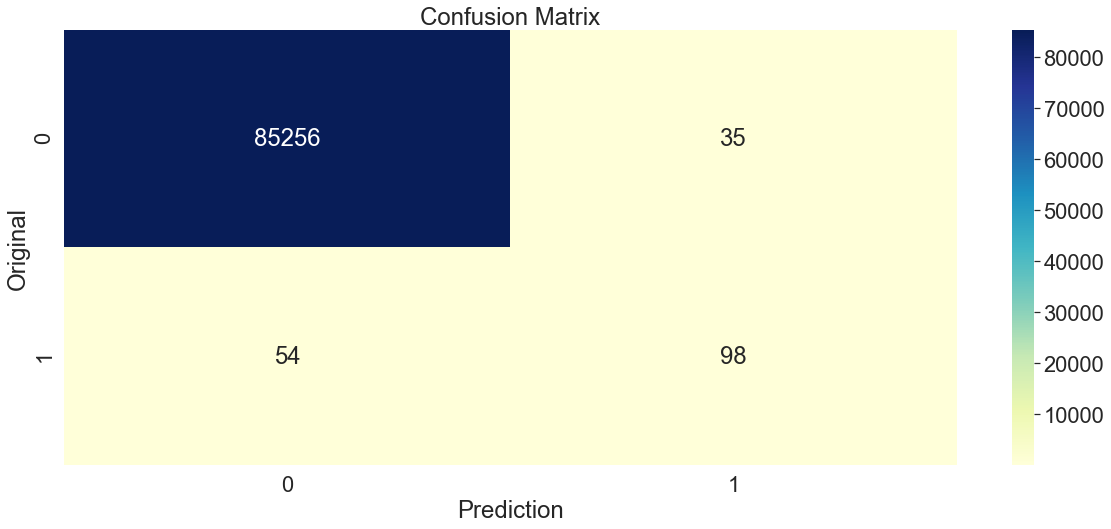

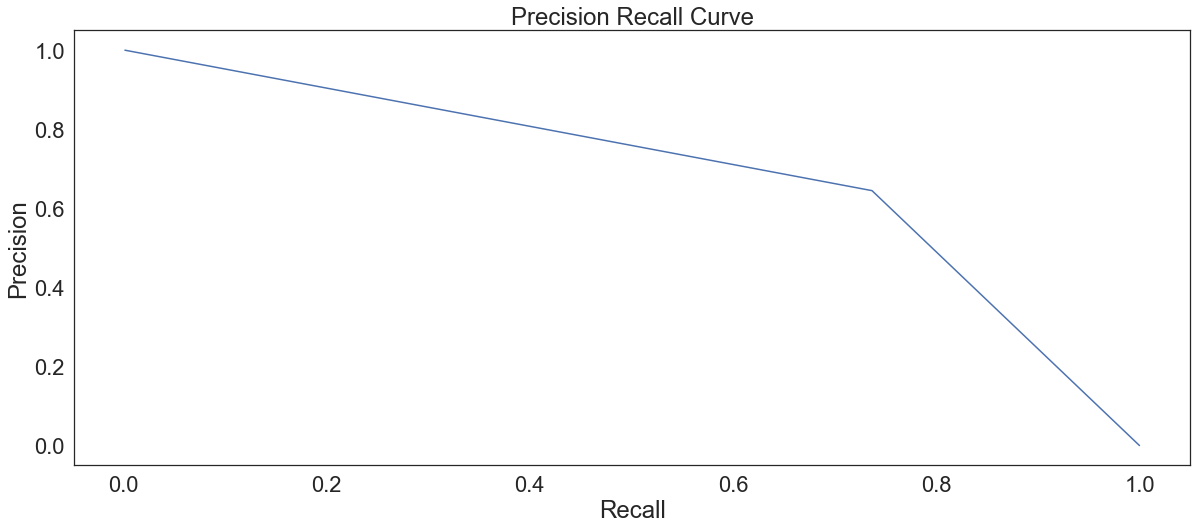

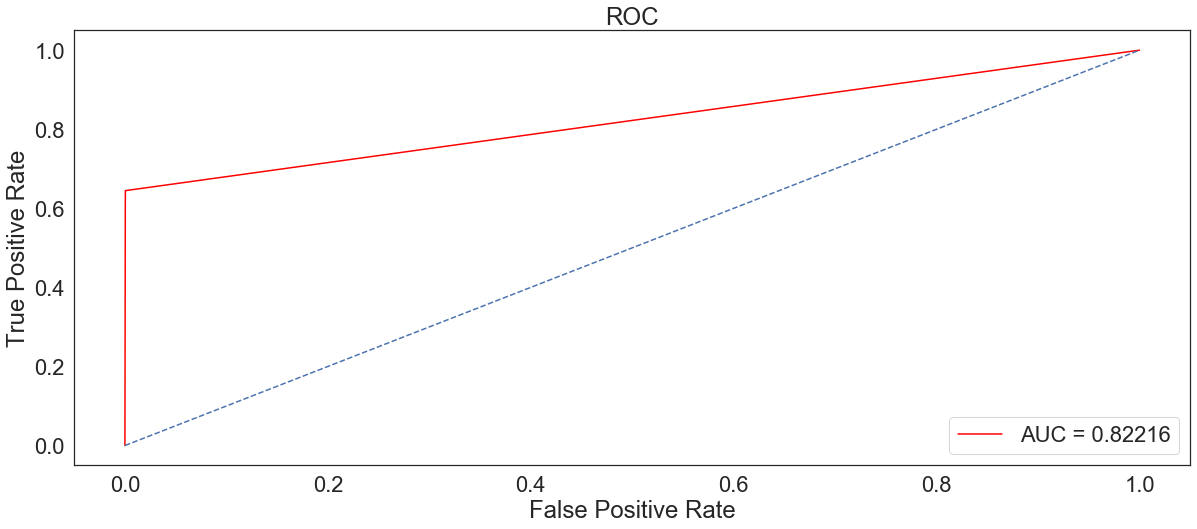

[Text(558.0, 326.15999999999997, 'V17 <= -2.754\ngini = 0.003\nsamples = 199364\nvalue = [199024, 340]\nclass = Normal'),
 Text(279.0, 108.72000000000003, 'gini = 0.35\nsamples = 310\nvalue = [70, 240]\nclass = Fraud'),
 Text(837.0, 108.72000000000003, 'gini = 0.001\nsamples = 199054\nvalue = [198954, 100]\nclass = Normal')]

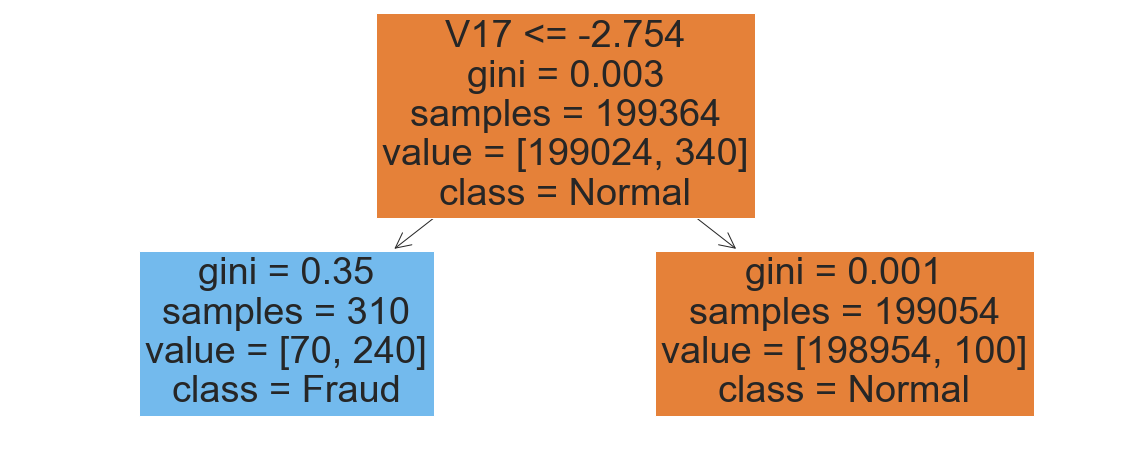

In [29]:
f1_dt_nosmote, auc_dt_nosmote = evaluation(dt_nosmote)
plt.figure(figsize=(20,8))
plot_tree(dt_nosmote, feature_names= list(X.columns[:]), class_names=('Normal', 'Fraud') , filled=True  )

### 2- Random Forest

In [30]:
param_grid = {
    'max_features' : ['auto', 'sqrt', 'log2'],
    'n_estimators' : [10, 20],
    'max_depth' : [3, 4, 5, 6, 7, 8, 9,10],
    'criterion' : ['gini', 'entropy']
}

rf = RandomForestClassifier(random_state = 3)
grid_search = GSCV(estimator=rf, param_grid=param_grid, cv=2, verbose=3 )
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 96 candidates, totalling 192 fits
[CV 1/2] END criterion=gini, max_depth=3, max_features=auto, n_estimators=10;, score=0.999 total time=   2.5s
[CV 2/2] END criterion=gini, max_depth=3, max_features=auto, n_estimators=10;, score=0.999 total time=   2.5s
[CV 1/2] END criterion=gini, max_depth=3, max_features=auto, n_estimators=20;, score=0.999 total time=   4.9s
[CV 2/2] END criterion=gini, max_depth=3, max_features=auto, n_estimators=20;, score=0.999 total time=   4.6s
[CV 1/2] END criterion=gini, max_depth=3, max_features=sqrt, n_estimators=10;, score=0.999 total time=   2.4s
[CV 2/2] END criterion=gini, max_depth=3, max_features=sqrt, n_estimators=10;, score=0.999 total time=   2.4s
[CV 1/2] END criterion=gini, max_depth=3, max_features=sqrt, n_estimators=20;, score=0.999 total time=   4.8s
[CV 2/2] END criterion=gini, max_depth=3, max_features=sqrt, n_estimators=20;, score=0.999 total time=   4.7s
[CV 1/2] END criterion=gini, max_depth=3, max_features=log

[CV 1/2] END criterion=gini, max_depth=9, max_features=auto, n_estimators=20;, score=1.000 total time=  12.8s
[CV 2/2] END criterion=gini, max_depth=9, max_features=auto, n_estimators=20;, score=1.000 total time=  14.9s
[CV 1/2] END criterion=gini, max_depth=9, max_features=sqrt, n_estimators=10;, score=0.999 total time=   6.8s
[CV 2/2] END criterion=gini, max_depth=9, max_features=sqrt, n_estimators=10;, score=0.999 total time=   6.5s
[CV 1/2] END criterion=gini, max_depth=9, max_features=sqrt, n_estimators=20;, score=1.000 total time=  12.9s
[CV 2/2] END criterion=gini, max_depth=9, max_features=sqrt, n_estimators=20;, score=1.000 total time=  12.9s
[CV 1/2] END criterion=gini, max_depth=9, max_features=log2, n_estimators=10;, score=0.999 total time=   5.3s
[CV 2/2] END criterion=gini, max_depth=9, max_features=log2, n_estimators=10;, score=0.999 total time=   5.4s
[CV 1/2] END criterion=gini, max_depth=9, max_features=log2, n_estimators=20;, score=0.999 total time=  10.6s
[CV 2/2] E

[CV 2/2] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=20;, score=0.999 total time=  15.3s
[CV 1/2] END criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=10;, score=0.999 total time=   7.7s
[CV 2/2] END criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=10;, score=0.999 total time=   7.8s
[CV 1/2] END criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=20;, score=1.000 total time=  14.9s
[CV 2/2] END criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=20;, score=0.999 total time=  15.5s
[CV 1/2] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=10;, score=0.999 total time=   6.0s
[CV 2/2] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=10;, score=0.999 total time=   6.3s
[CV 1/2] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=20;, score=0.999 total time=  12.5s
[CV 2/2] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=20;, score=0.999 to

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 20]},
             verbose=3)

In [31]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'auto',
 'n_estimators': 20}

In [34]:
rf_nosmote = RandomForestClassifier(criterion= 'gini', max_depth=9, max_features='auto', n_estimators=20)
rf_nosmote.fit(X_train, y_train)


RandomForestClassifier(max_depth=9, n_estimators=20)

******Evaluating Model**********

Accuracy: 0.999
Precision: 0.935
Recall: 0.757
F1-Score: 0.836


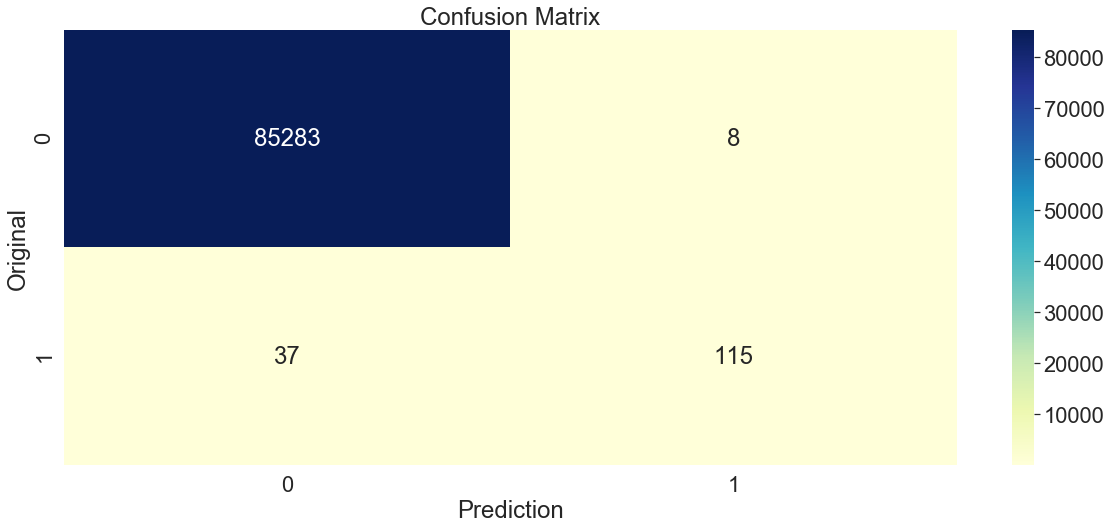

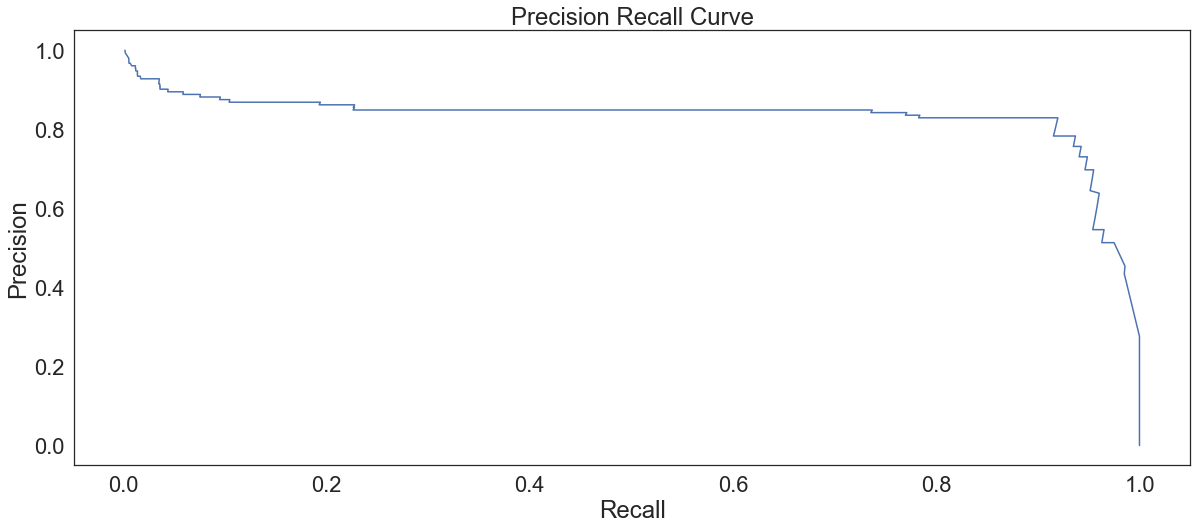

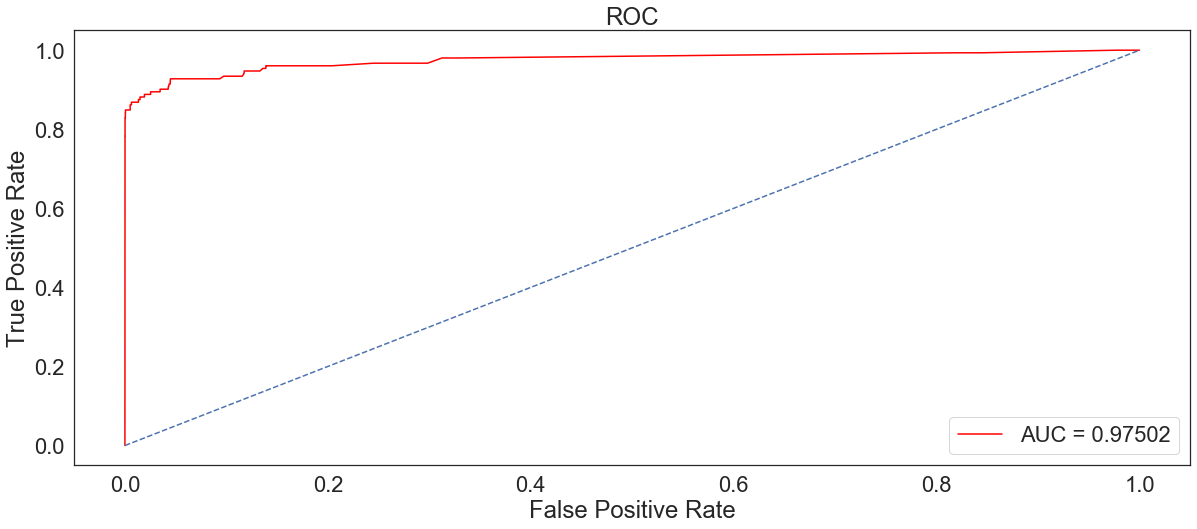

In [35]:
f1_rf_nosmote, auc_rf_nosmote= evaluation(rf_nosmote)

In [93]:
get_rf_importance(rf_nosmote)

Features Importance:
  Feature  Importance
8      V7    0.032384
5      V4    0.028732
4      V3    0.018834
0    Time    0.014112
7      V6    0.013484
6      V5    0.012094
3      V2    0.008455
2      V1    0.007379
9      V8    0.007279
1  Amount    0.005337


### 3- Logistic regression

In [37]:
param_grid = {
    'solver' : ['liblinear'],
    'penalty' : ['l1', 'l2']
}

logreg = LogisticRegression(random_state = 3)
grid_search = GSCV(estimator=logreg, param_grid=param_grid, cv=10, verbose=3 )
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
[CV 1/10] END .....penalty=l1, solver=liblinear;, score=0.999 total time=  17.0s
[CV 2/10] END .....penalty=l1, solver=liblinear;, score=1.000 total time=  10.0s
[CV 3/10] END .....penalty=l1, solver=liblinear;, score=0.999 total time=  10.6s
[CV 4/10] END .....penalty=l1, solver=liblinear;, score=0.999 total time=  10.6s
[CV 5/10] END .....penalty=l1, solver=liblinear;, score=0.999 total time=   8.8s
[CV 6/10] END .....penalty=l1, solver=liblinear;, score=0.999 total time=  10.4s
[CV 7/10] END .....penalty=l1, solver=liblinear;, score=0.999 total time=   7.6s
[CV 8/10] END .....penalty=l1, solver=liblinear;, score=0.999 total time=   9.3s
[CV 9/10] END .....penalty=l1, solver=liblinear;, score=0.999 total time=  10.0s
[CV 10/10] END ....penalty=l1, solver=liblinear;, score=0.999 total time=   9.9s
[CV 1/10] END .....penalty=l2, solver=liblinear;, score=0.999 total time=   7.2s
[CV 2/10] END .....penalty=l2, solver=liblinear;

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=3),
             param_grid={'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             verbose=3)

In [38]:
logreg_nosmote = grid_search.best_params_
logreg_nosmote

{'penalty': 'l1', 'solver': 'liblinear'}

******Evaluating Model**********

Accuracy: 0.999
Precision: 0.879
Recall: 0.618
F1-Score: 0.726


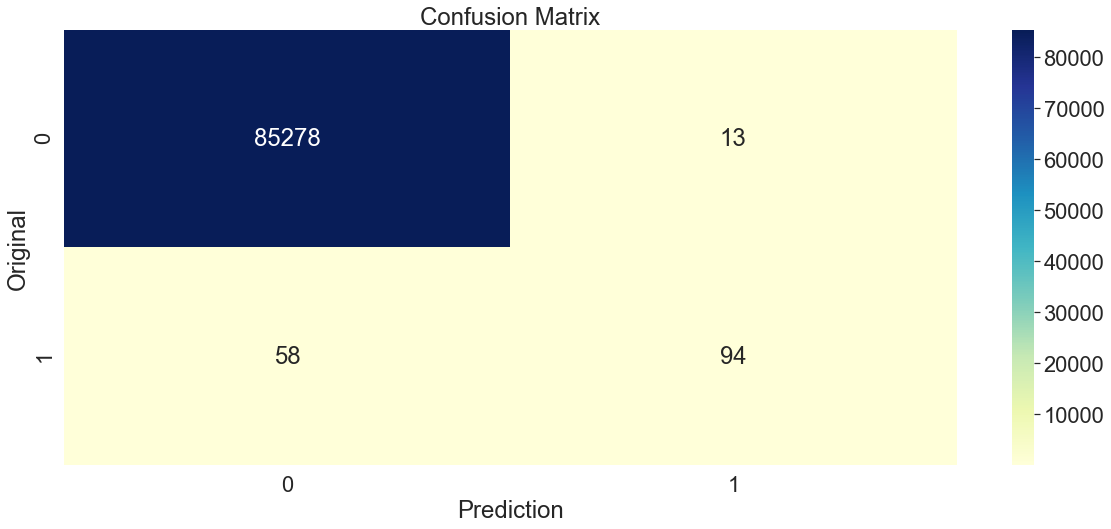

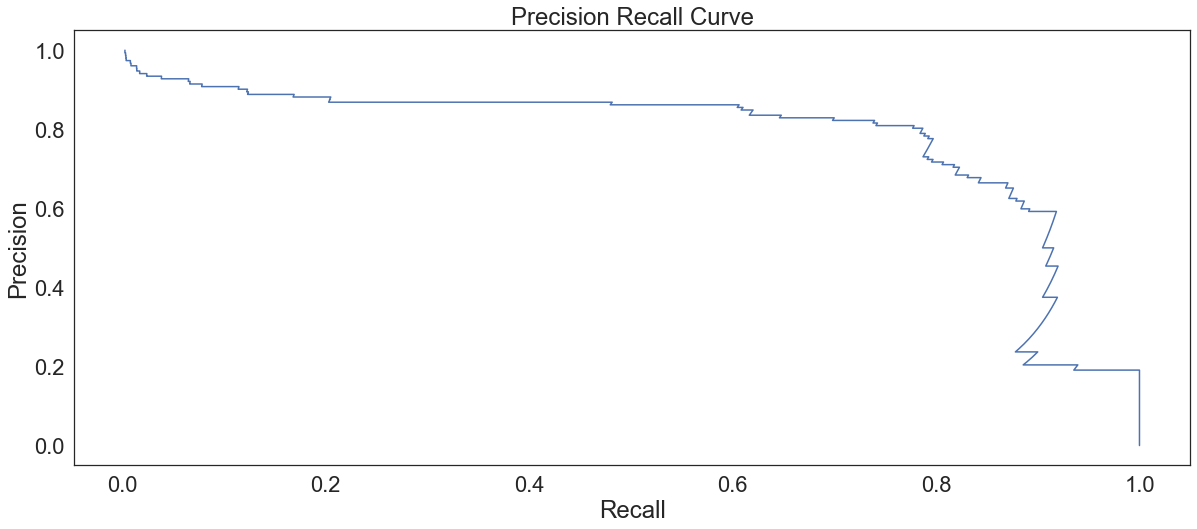

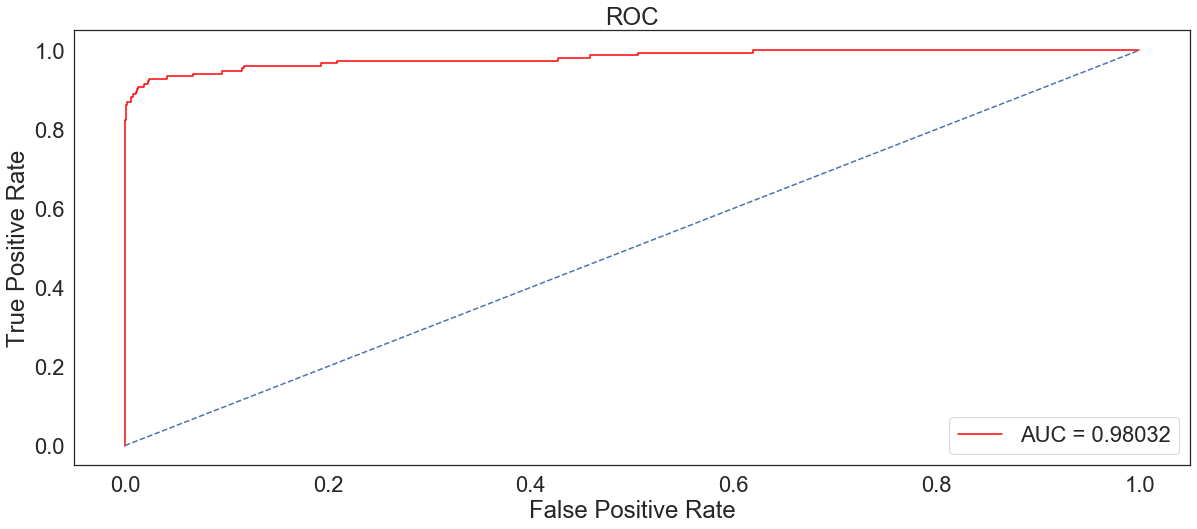

In [39]:
logreg_nosmote = LogisticRegression(solver = 'liblinear', penalty='l1', random_state=3) #best solver for our data (binairy and small)
logreg_nosmote.fit(X_train,y_train)
f1_logreg_nosmote, auc_logreg_nosmote = evaluation(logreg_nosmote)

In [103]:
get_log_function(logreg_nosmote)

Equation : 
   Variables  Coefficient
0       Time    -0.259983
1     Amount     0.049760
2         V1     0.042300
3         V2     0.025000
4         V3    -0.011424
5         V4     0.632438
6         V5     0.114149
7         V6    -0.127691
8         V7    -0.068465
9         V8    -0.175799
10        V9    -0.234991
11       V10    -0.747707
12       V11    -0.001533
13       V12     0.013686
14       V13    -0.244243
15       V14    -0.532106
16       V15    -0.160873
17       V16    -0.027543
18       V17    -0.022214
19       V18    -0.040457
20       V19     0.223394
21       V20    -0.327304
22       V21     0.412026
23       V22     0.680608
24       V23    -0.124277
25       V24     0.000000
26       V25    -0.095799
27       V26     0.018870
28       V27    -0.676913
29       V28    -0.236757
30  Constant    -8.530332


### 4- Neural Network ( Dorpout(0.5), EarlyStop)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1984      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 4,130
Trainable params: 4,130
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
532/532 [==============================] - 6s 6ms/step - loss: 0.2699 - accuracy: 0.8794 - val_loss: 0.0096 

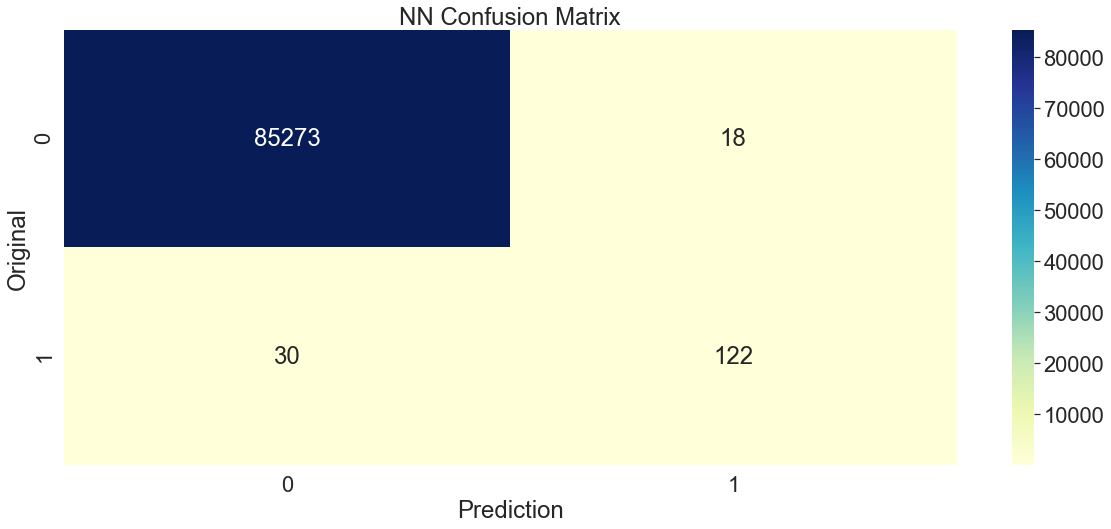

In [30]:
f1_nn_nosmote=neurnet_nosmote()

### 5- Bagging

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


******Evaluating Model**********

Accuracy: 0.999
Precision: 0.737
Recall: 0.645
F1-Score: 0.688


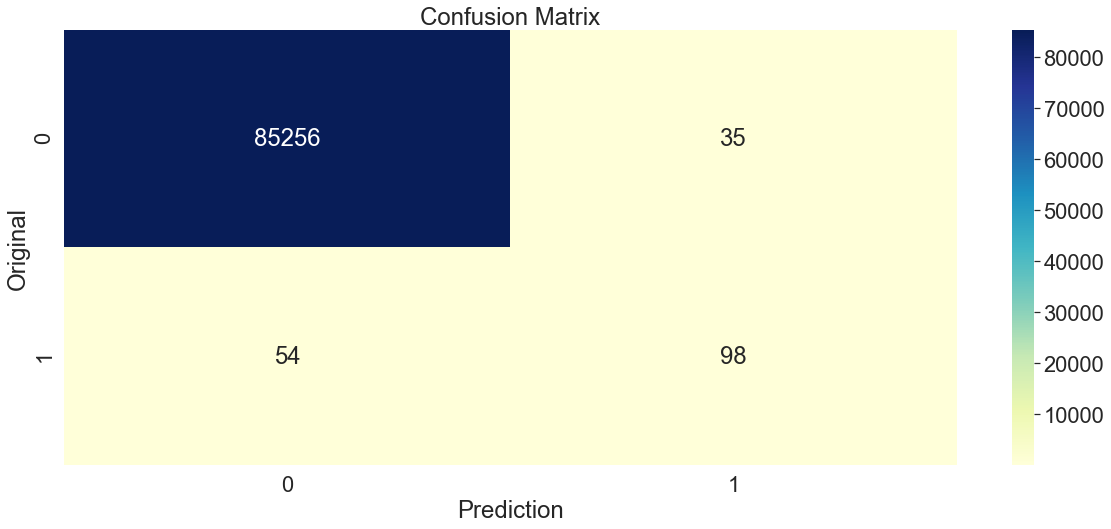

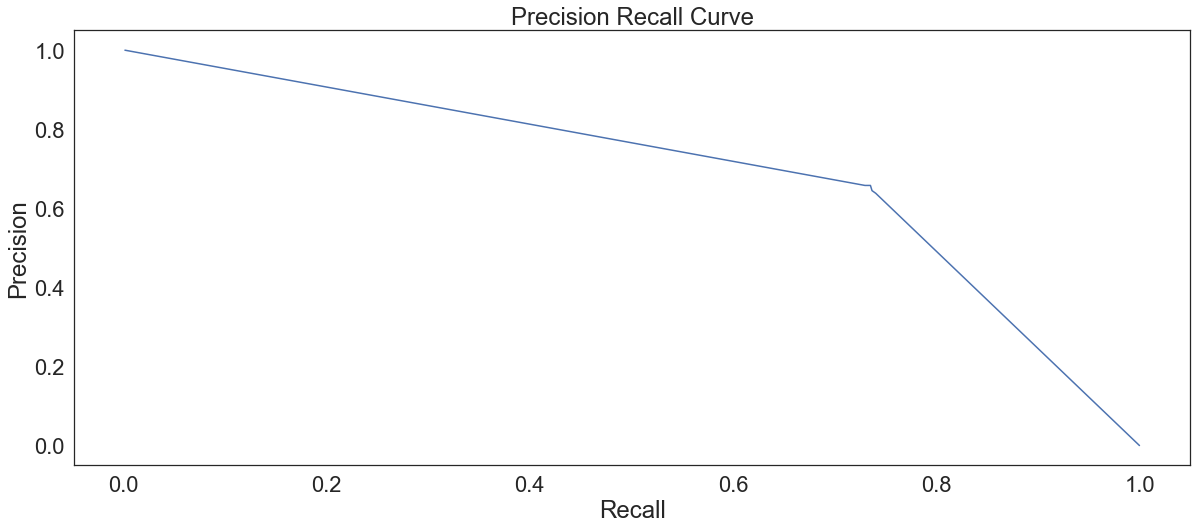

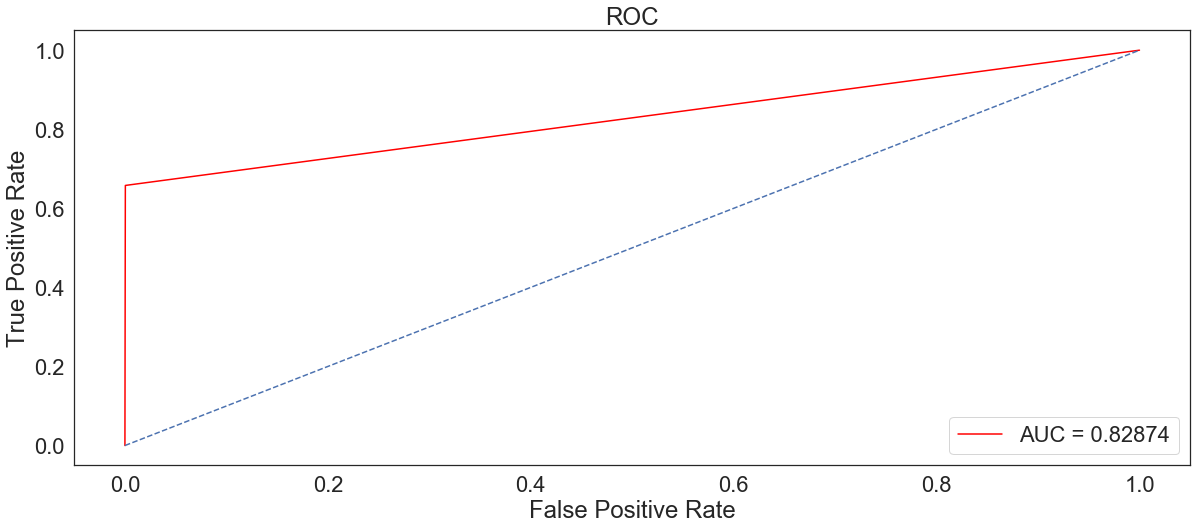

In [42]:
bc_nosmote = BaggingClassifier(dt_nosmote, oob_score=True, random_state = 3)
bc_nosmote.fit(X_train, y_train)
f1_bc_nosmote, auc_bc = evaluation(bc_nosmote)

In [43]:
save_fitted_model('bc_nosmote_v2', bc_nosmote)

### 7- Comparing models before SMOTE

In [69]:
def Compare_my_models(l1, l2):
    res = pd.DataFrame({
        'Model' : ['Decision Tree', 'Random Forest','Logistic Regression',
                   'Neural Network', 'Bagging Classifier'],
        'F1-Score' : l1,
        'AUC' : l2
    })
    
    plt.figure(figsize=(20,8))
    plt.bar(res['Model'], res['F1-Score'])
    plt.xlabel("Models")
    plt.ylabel("F1-Scores")
    plt.xticks(rotation = 30)
    plt.title("Comparison between the Models via f-score")
    plt.show()
    
    plt.figure(figsize=(20,8))
    plt.bar(res['Model'], res['AUC'])
    plt.xlabel("Models")
    plt.ylabel("AUCs")
    plt.xticks(rotation = 30)
    plt.title("Comparison between the Models via AUC")
    plt.show()
    
    print()
    print('-------SORTED MODELS BY F1-SCORE----------')
    print(res.sort_values(by='F1-Score', ascending=False))
    
    print('******************************************')
    print('--------------------------***********-----')
    print('----------------**********----------------')
    print('--------*********-------------------------')
    print('********----------------------------------')
    print('******************************************')
    
    print()
    print('-----------SORTED MODELS BY AUC------------')
    print(res.sort_values(by='AUC', ascending=False))

******Evaluating Model**********

Accuracy: 0.999
Precision: 0.737
Recall: 0.645
F1-Score: 0.688


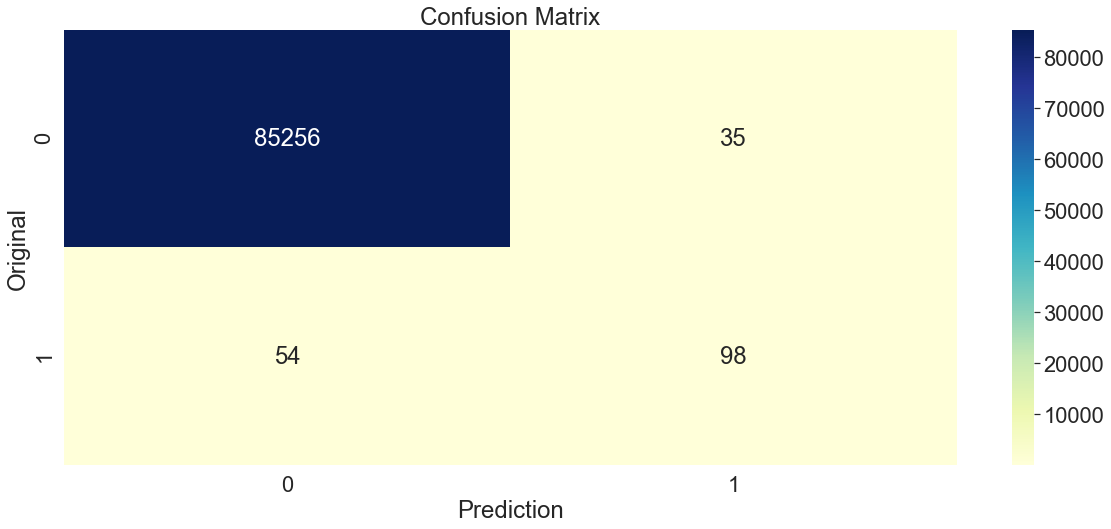

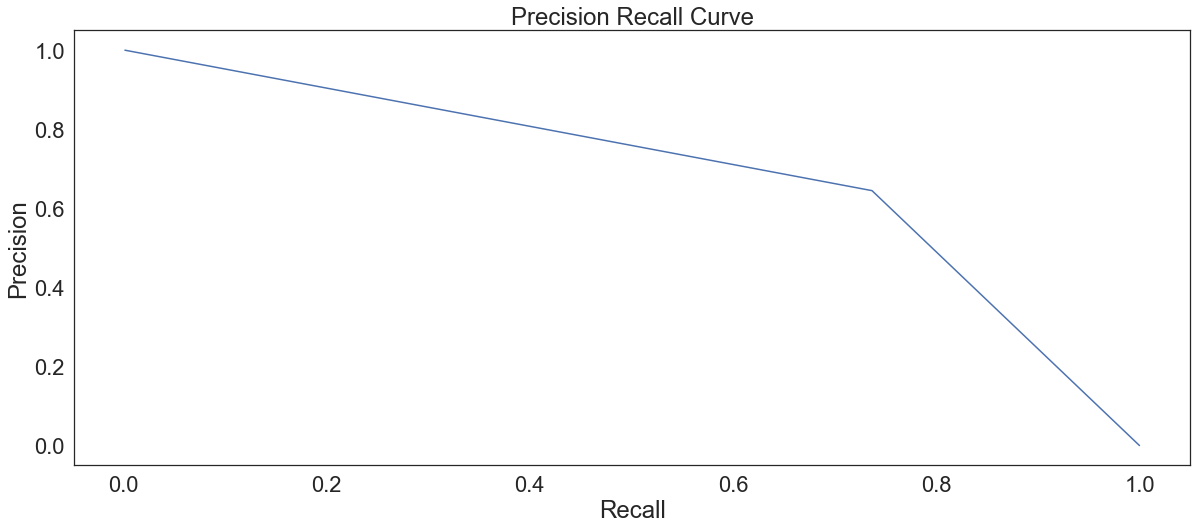

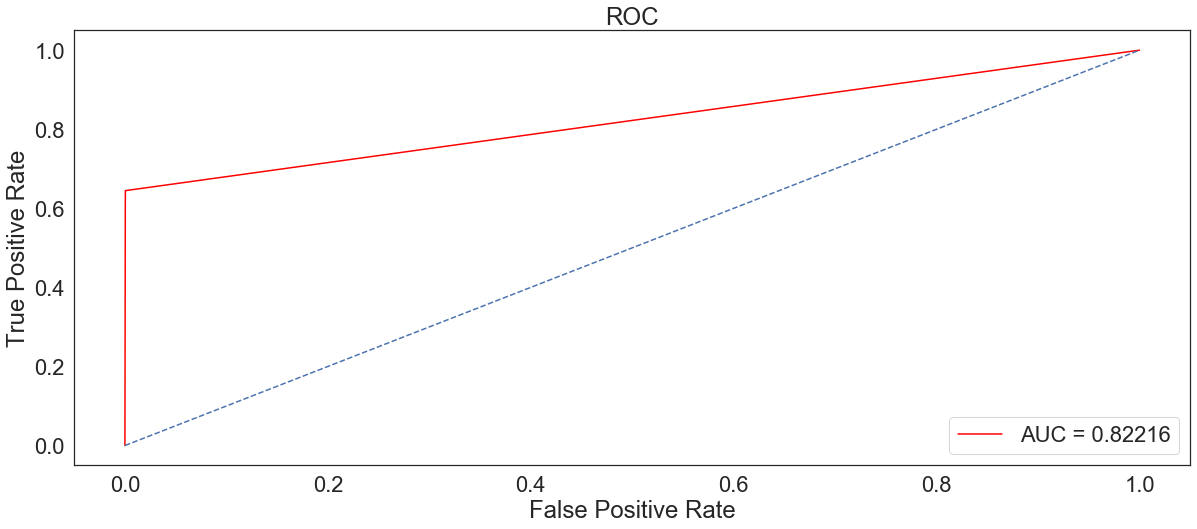

******Evaluating Model**********

Accuracy: 0.999
Precision: 0.879
Recall: 0.618
F1-Score: 0.726


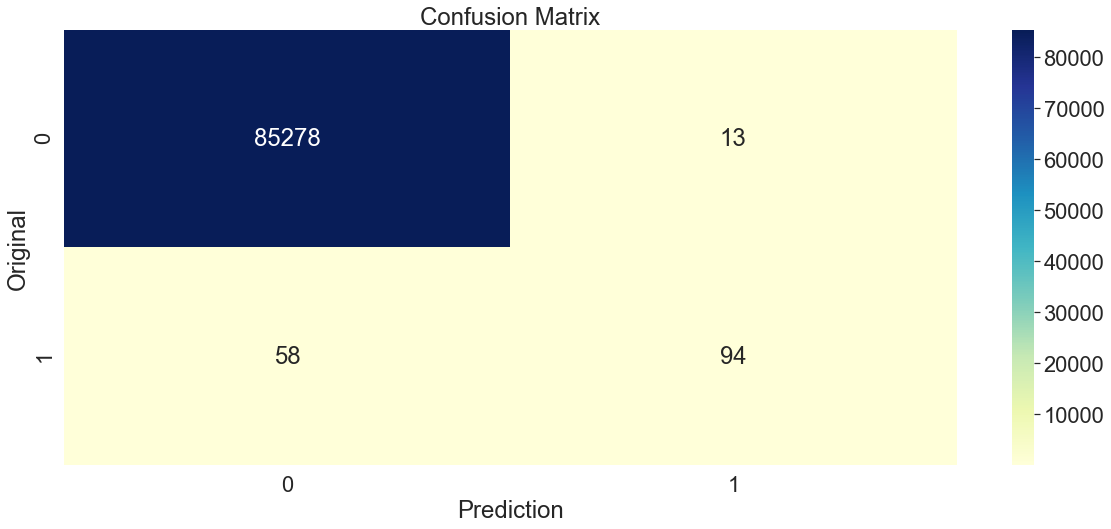

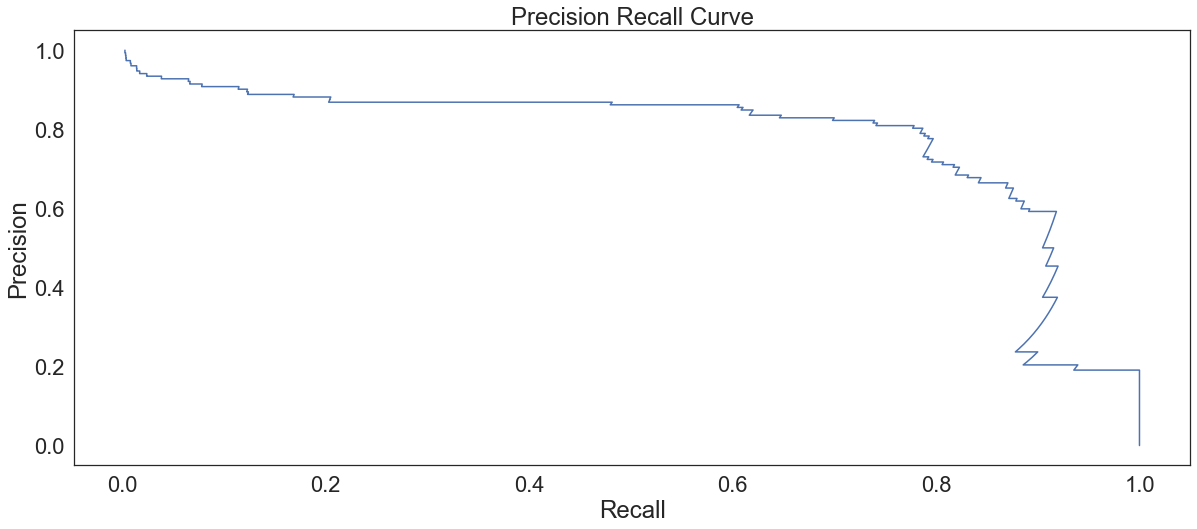

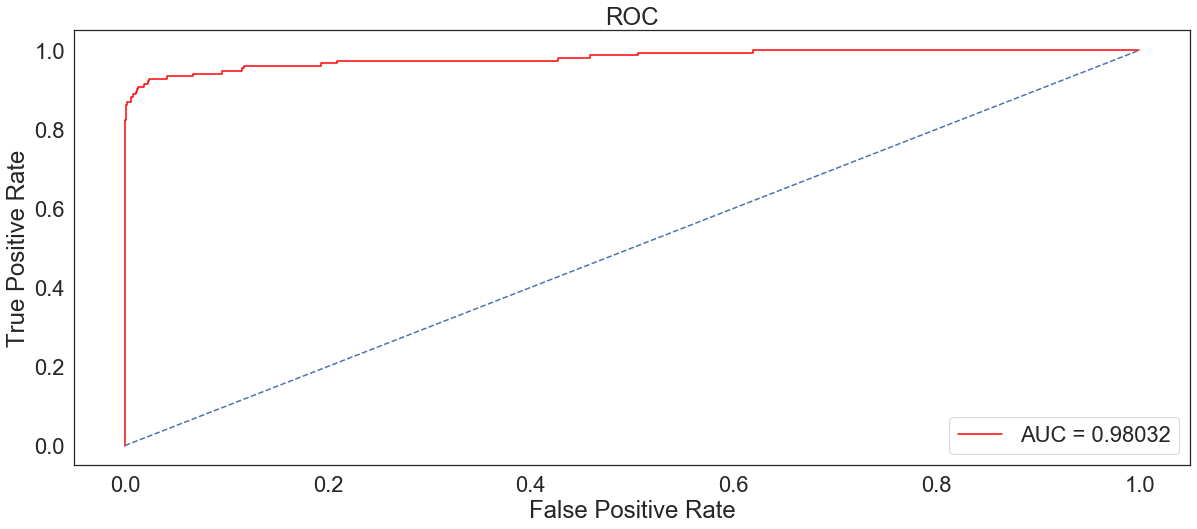

******Evaluating Model**********

Accuracy: 0.999
Precision: 0.935
Recall: 0.757
F1-Score: 0.836


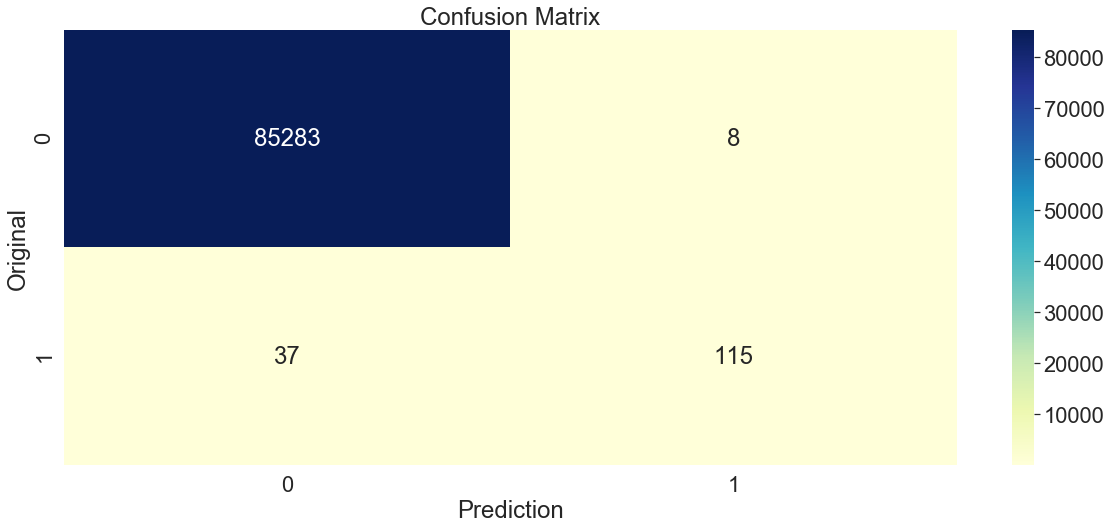

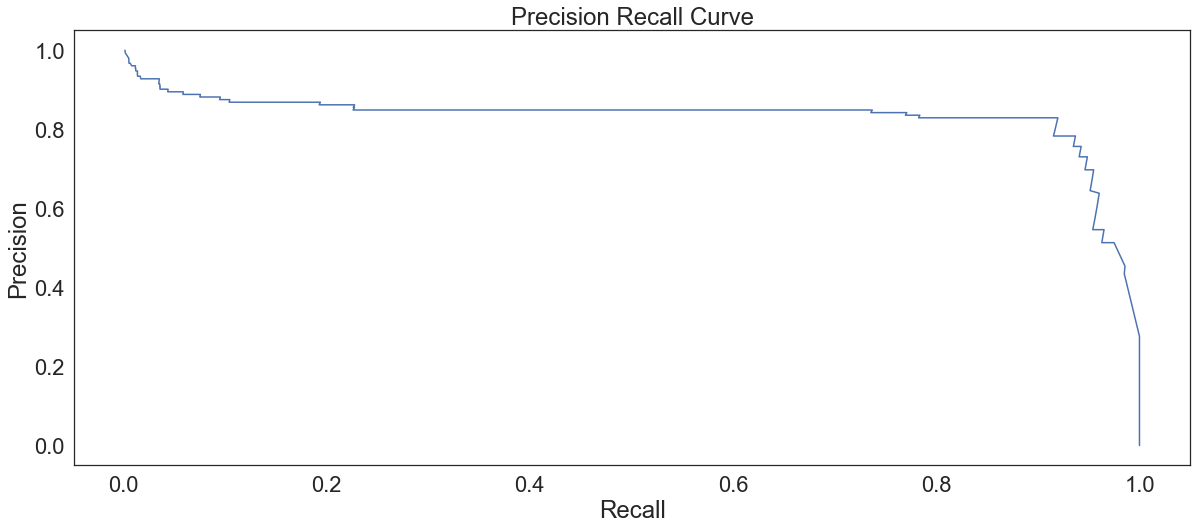

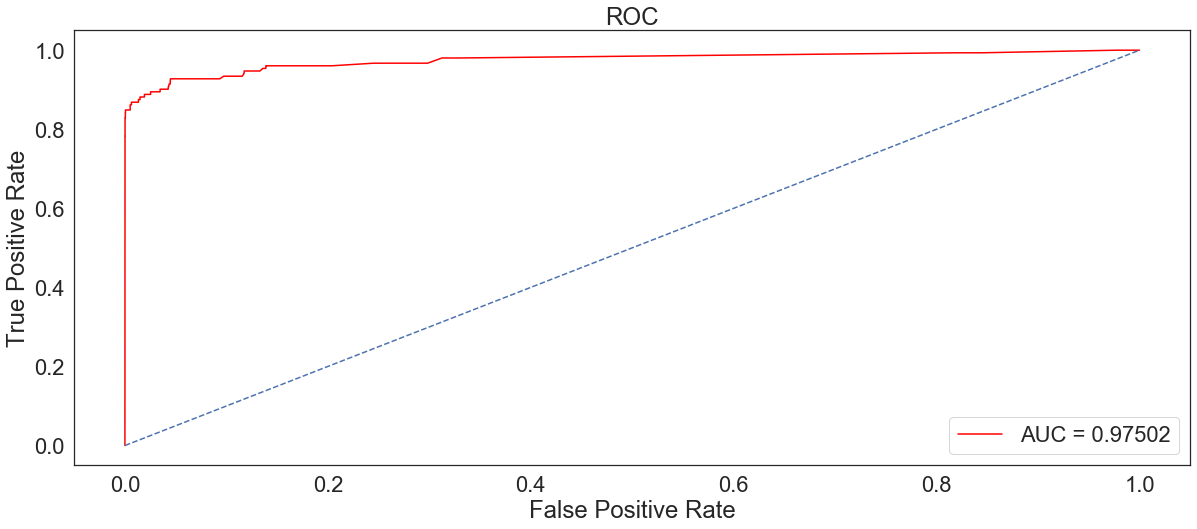

******Evaluating Model**********

Accuracy: 0.999
Precision: 0.737
Recall: 0.645
F1-Score: 0.688


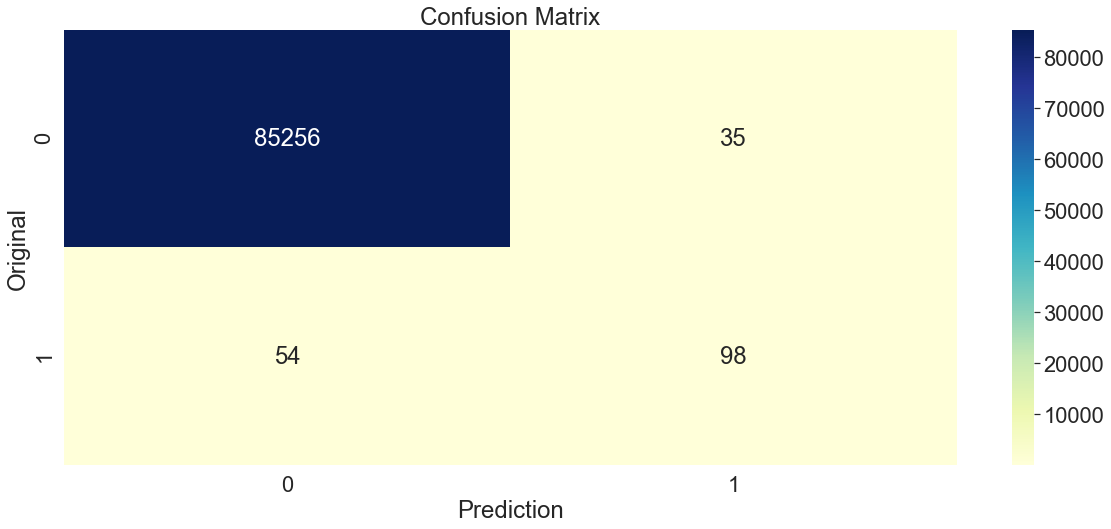

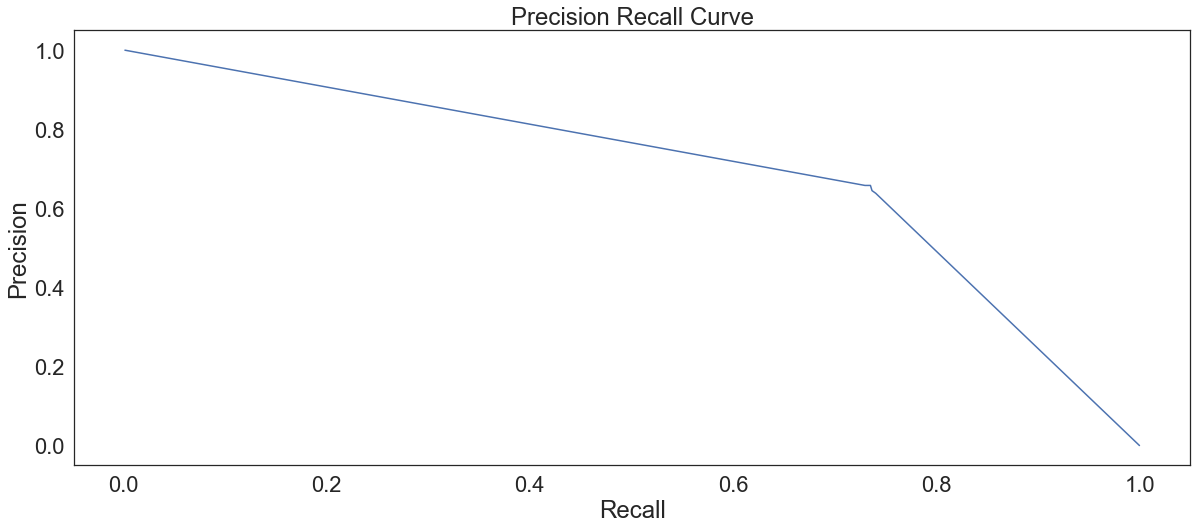

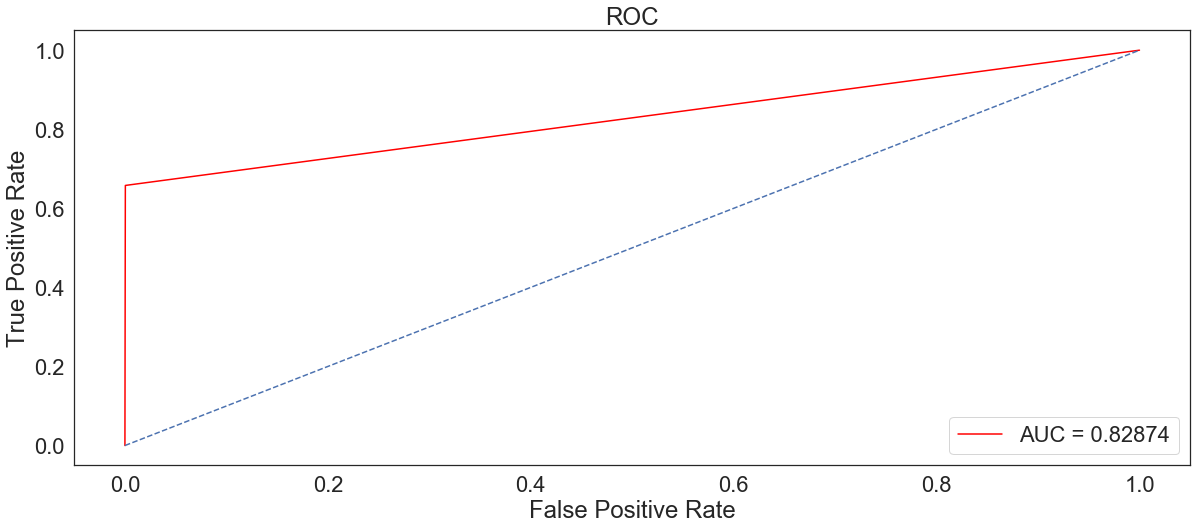

In [63]:
bc_nosmote = load_models('bc_nosmote_v2') #baggingClassifier wo/ smote
dt_nosmote = load_models('dt_nosmote_v2') # Decision Tree wo/ smote
logreg_nosmote = load_models('logreg_nosmote_v2') # Logistic Regression wo/ smote
rf_nosmote = load_models('rf_nosmote_v2') # RainForest wo/ smote

f1_dt_nosmote, auc_dt_nosmote = evaluation(dt_nosmote)
f1_logreg_nosmote, auc_logreg_nosmote = evaluation(logreg_nosmote)
f1_rf_nosmote, auc_rf_nosmote = evaluation(rf_nosmote)
f1_bc_nosmote, auc_bc_nosmote = evaluation(bc_nosmote)


# Comparing models BEFORE SMOTE

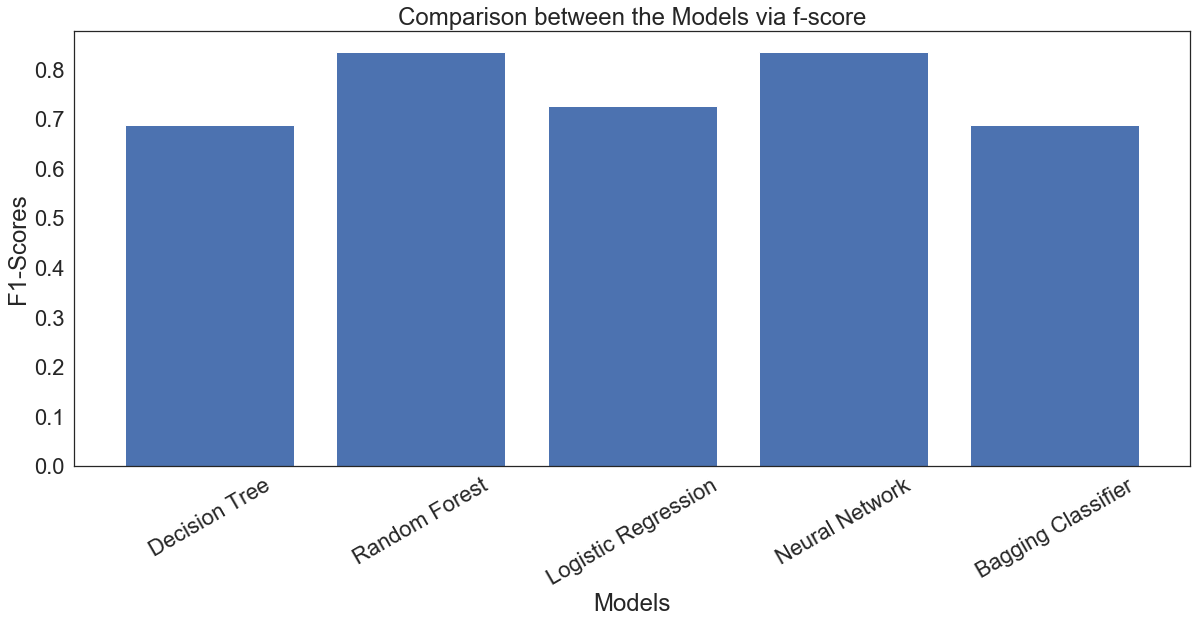

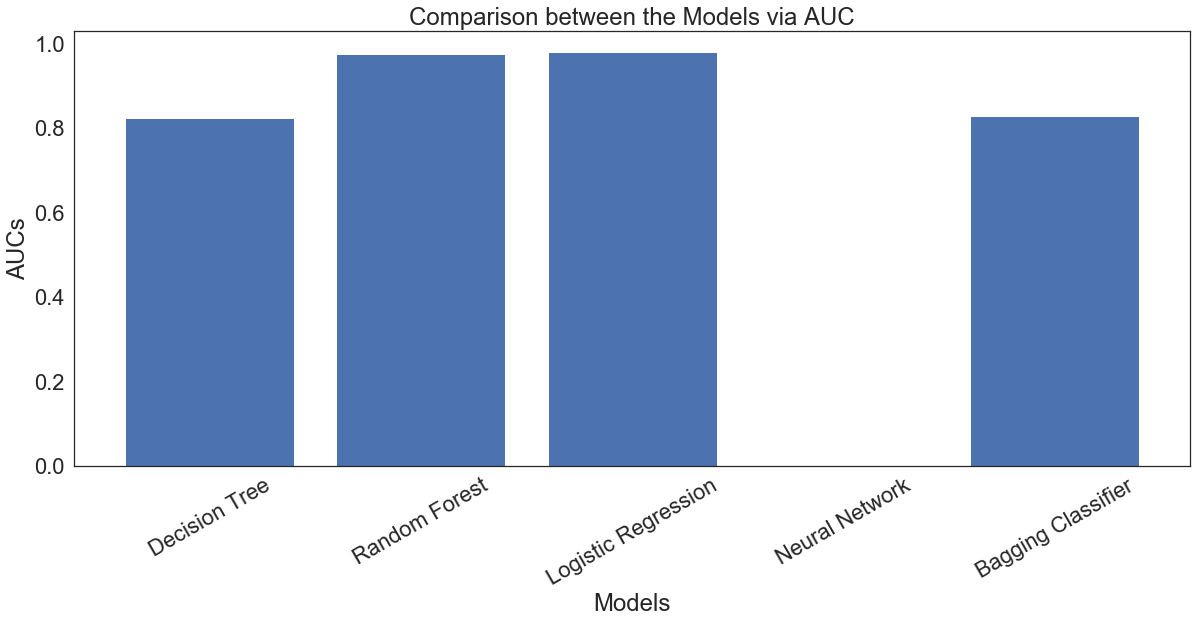


-------SORTED MODELS BY F1-SCORE----------
                 Model  F1-Score       AUC
1        Random Forest  0.836364  0.975021
3       Neural Network  0.835616       NaN
2  Logistic Regression  0.725869  0.980323
0        Decision Tree  0.687719  0.822163
4   Bagging Classifier  0.687719  0.828738
******************************************
--------------------------***********-----
----------------**********----------------
--------*********-------------------------
********----------------------------------
******************************************

-----------SORTED MODELS BY AUC------------
                 Model  F1-Score       AUC
2  Logistic Regression  0.725869  0.980323
1        Random Forest  0.836364  0.975021
4   Bagging Classifier  0.687719  0.828738
0        Decision Tree  0.687719  0.822163
3       Neural Network  0.835616       NaN


In [70]:
f1_nosmote=[f1_dt_nosmote, f1_rf_nosmote, f1_logreg_nosmote, f1_nn_nosmote, f1_bc_nosmote]
a=[auc_dt_nosmote, auc_rf_nosmote, auc_logreg_nosmote, None, auc_bc_nosmote]
Compare_my_models(f1_nosmote, a)

## II- Applying SMOTE

*****Before OverSampling******
number of non-frauds : 199024
number of Frauds : 340

*****After Oversampling******
X_train Shape: (398048, 30)
y_train Shape: (398048,)


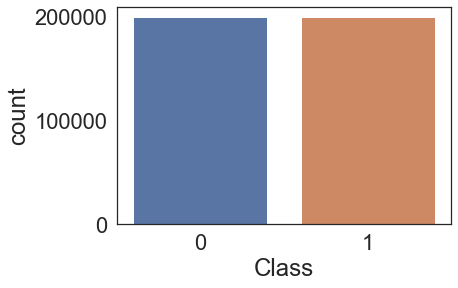

In [71]:
print("*****Before OverSampling******")
print("number of non-frauds : "+ str(sum(y_train==0)))
print("number of Frauds : "+ str(sum(y_train==1)))

sm=SMOTE(random_state=0)
X_train, y_train = sm.fit_resample(X_train, y_train)

print()
print("*****After Oversampling******")
print("X_train Shape: " + str(X_train.shape))
print("y_train Shape: "+str(y_train.shape))

sns.countplot(x=y_train, data=df)

In [72]:
#neural network function

def neurnet_smote(Xtr=X_train, ytr= y_train, Xtst=X_test, ytst= y_test):
    model = Sequential()
    model.add(Dense(64, input_shape=(Xtr.shape[1],) , activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    #model.add(Dense(1, activation = 'sigmoid'))
    #model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    model.summary()
    model.fit(Xtr, ytr, validation_split=0.2, epochs=100, batch_size=300, callbacks = mycallbacks,verbose=1)
    
    model_loss = pd.DataFrame(model.history.history)
    model_loss.plot
    
    score = model.evaluate(Xtst, ytst)
    print(score)
    
    y_pred = np.argmax(model.predict(Xtst), axis=-1)
    print('***********EVALUATION************')
    print()
    metrics(ytst,y_pred)
    
    plt.figure(figsize = (20,8))
    cm=confusion_matrix(ytst, y_pred)
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap='YlGnBu', fmt='g')
    plt.ylabel('Original')
    plt.xlabel('Prediction')
    plt.title('NN Confusion Matrix')
    plt.show()
    
    return f1_score(ytst, y_pred)

## Models After Balancing our data

### 1- Decision Tree

In [73]:
param_grid = {
    'ccp_alpha' : [0.1, 0.01, 0.001],
    'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10],
    'criterion' : ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state = 3)
grid_search = GSCV(estimator=dt, param_grid=param_grid, cv=2, verbose=3 )
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 48 candidates, totalling 96 fits
[CV 1/2] END ccp_alpha=0.1, criterion=gini, max_depth=3;, score=0.919 total time=   4.6s
[CV 2/2] END ccp_alpha=0.1, criterion=gini, max_depth=3;, score=0.919 total time=   4.2s
[CV 1/2] END ccp_alpha=0.1, criterion=gini, max_depth=4;, score=0.919 total time=   5.6s
[CV 2/2] END ccp_alpha=0.1, criterion=gini, max_depth=4;, score=0.919 total time=   5.3s
[CV 1/2] END ccp_alpha=0.1, criterion=gini, max_depth=5;, score=0.919 total time=   6.3s
[CV 2/2] END ccp_alpha=0.1, criterion=gini, max_depth=5;, score=0.919 total time=   6.2s
[CV 1/2] END ccp_alpha=0.1, criterion=gini, max_depth=6;, score=0.919 total time=   7.6s
[CV 2/2] END ccp_alpha=0.1, criterion=gini, max_depth=6;, score=0.919 total time=   7.4s
[CV 1/2] END ccp_alpha=0.1, criterion=gini, max_depth=7;, score=0.919 total time=   8.5s
[CV 2/2] END ccp_alpha=0.1, criterion=gini, max_depth=7;, score=0.919 total time=   8.6s
[CV 1/2] END ccp_alpha=0.1, criterion=gini, max_d

[CV 2/2] END ccp_alpha=0.001, criterion=entropy, max_depth=7;, score=0.963 total time=  19.0s
[CV 1/2] END ccp_alpha=0.001, criterion=entropy, max_depth=8;, score=0.971 total time=  18.4s
[CV 2/2] END ccp_alpha=0.001, criterion=entropy, max_depth=8;, score=0.972 total time=  14.3s
[CV 1/2] END ccp_alpha=0.001, criterion=entropy, max_depth=9;, score=0.974 total time=  14.7s
[CV 2/2] END ccp_alpha=0.001, criterion=entropy, max_depth=9;, score=0.974 total time=  14.9s
[CV 1/2] END ccp_alpha=0.001, criterion=entropy, max_depth=10;, score=0.977 total time=  16.8s
[CV 2/2] END ccp_alpha=0.001, criterion=entropy, max_depth=10;, score=0.977 total time=  14.9s


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(random_state=3),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=3)

In [74]:
dt_smote = grid_search.best_estimator_
dt_smote

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=10,
                       random_state=3)

In [75]:
save_fitted_model('dt_smote_v2', dt_smote)

******Evaluating Model**********

Accuracy: 0.972
Precision: 0.054
Recall: 0.908
F1-Score: 0.102


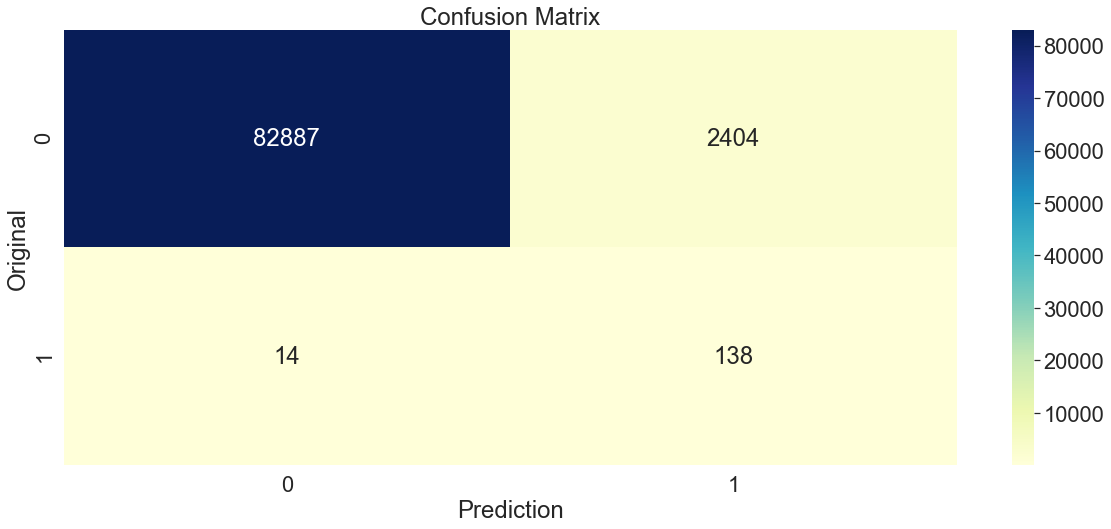

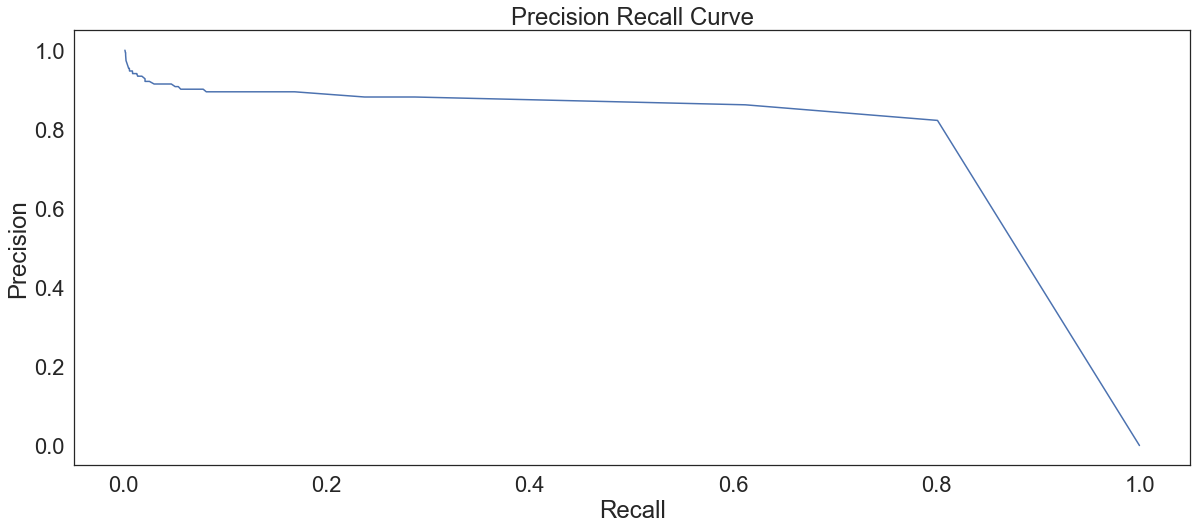

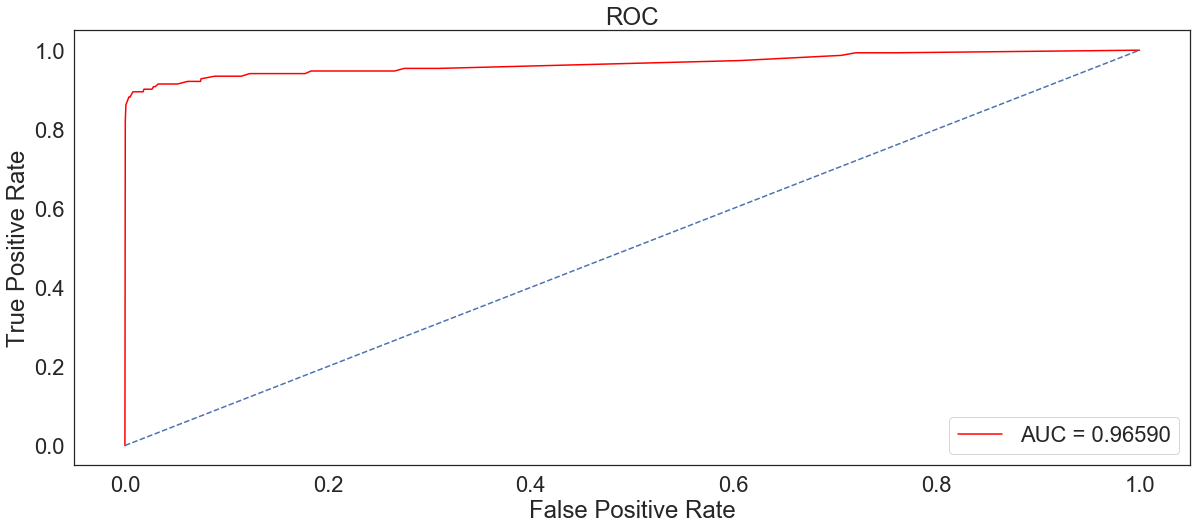

[Text(558.0, 326.15999999999997, 'V17 <= -2.754\ngini = 0.003\nsamples = 199364\nvalue = [199024, 340]\nclass = Normal'),
 Text(279.0, 108.72000000000003, 'gini = 0.35\nsamples = 310\nvalue = [70, 240]\nclass = Fraud'),
 Text(837.0, 108.72000000000003, 'gini = 0.001\nsamples = 199054\nvalue = [198954, 100]\nclass = Normal')]

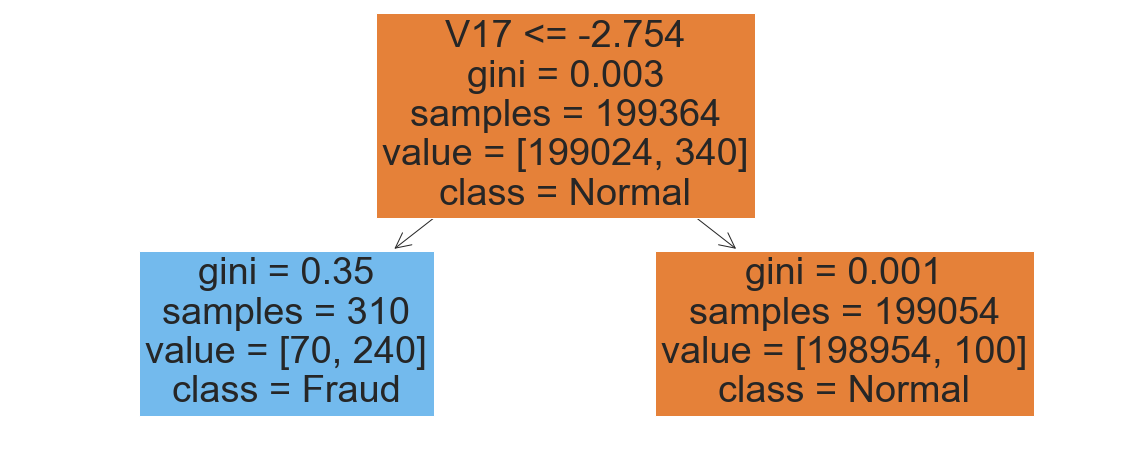

In [76]:
f1_dt_smote, auc_dt_smote = evaluation(dt_smote)
plt.figure(figsize=(20,8))
plot_tree(dt_nosmote, feature_names= list(X.columns[:]), class_names=('Normal', 'Fraud') , filled=True  )

### 2- Random Forest

In [77]:
param_grid = {
    'max_features' : ['auto', 'sqrt', 'log2'],
    'n_estimators' : [10, 20],
    'max_depth' : [3, 4, 5, 6, 7, 8, 9,10],
    'criterion' : ['gini', 'entropy']
}

rf = RandomForestClassifier(random_state = 3)
grid_search = GSCV(estimator=rf, param_grid=param_grid, cv=2, verbose=3 )
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 96 candidates, totalling 192 fits
[CV 1/2] END criterion=gini, max_depth=3, max_features=auto, n_estimators=10;, score=0.929 total time=   5.4s
[CV 2/2] END criterion=gini, max_depth=3, max_features=auto, n_estimators=10;, score=0.927 total time=   6.0s
[CV 1/2] END criterion=gini, max_depth=3, max_features=auto, n_estimators=20;, score=0.931 total time=  10.7s
[CV 2/2] END criterion=gini, max_depth=3, max_features=auto, n_estimators=20;, score=0.930 total time=  10.2s
[CV 1/2] END criterion=gini, max_depth=3, max_features=sqrt, n_estimators=10;, score=0.929 total time=   5.1s
[CV 2/2] END criterion=gini, max_depth=3, max_features=sqrt, n_estimators=10;, score=0.927 total time=   5.7s
[CV 1/2] END criterion=gini, max_depth=3, max_features=sqrt, n_estimators=20;, score=0.931 total time=  12.9s
[CV 2/2] END criterion=gini, max_depth=3, max_features=sqrt, n_estimators=20;, score=0.930 total time=  12.9s
[CV 1/2] END criterion=gini, max_depth=3, max_features=log

[CV 1/2] END criterion=gini, max_depth=9, max_features=auto, n_estimators=20;, score=0.985 total time=  24.8s
[CV 2/2] END criterion=gini, max_depth=9, max_features=auto, n_estimators=20;, score=0.982 total time=  28.3s
[CV 1/2] END criterion=gini, max_depth=9, max_features=sqrt, n_estimators=10;, score=0.982 total time=  15.6s
[CV 2/2] END criterion=gini, max_depth=9, max_features=sqrt, n_estimators=10;, score=0.978 total time=  15.0s
[CV 1/2] END criterion=gini, max_depth=9, max_features=sqrt, n_estimators=20;, score=0.985 total time=  29.2s
[CV 2/2] END criterion=gini, max_depth=9, max_features=sqrt, n_estimators=20;, score=0.982 total time=  32.9s
[CV 1/2] END criterion=gini, max_depth=9, max_features=log2, n_estimators=10;, score=0.979 total time=  13.1s
[CV 2/2] END criterion=gini, max_depth=9, max_features=log2, n_estimators=10;, score=0.977 total time=  13.2s
[CV 1/2] END criterion=gini, max_depth=9, max_features=log2, n_estimators=20;, score=0.980 total time=  23.8s
[CV 2/2] E

[CV 2/2] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=20;, score=0.960 total time= 3.2min
[CV 1/2] END criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=10;, score=0.962 total time=  43.6s
[CV 2/2] END criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=10;, score=0.961 total time= 1.4min
[CV 1/2] END criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=20;, score=0.967 total time= 3.3min
[CV 2/2] END criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=20;, score=0.960 total time= 2.9min
[CV 1/2] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=10;, score=0.958 total time= 1.1min
[CV 2/2] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=10;, score=0.959 total time= 1.3min
[CV 1/2] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=20;, score=0.958 total time= 1.8min
[CV 2/2] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=20;, score=0.958 to

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 20]},
             verbose=3)

In [78]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 10}

******Evaluating Model**********

Accuracy: 0.997
Precision: 0.392
Recall: 0.862
F1-Score: 0.539


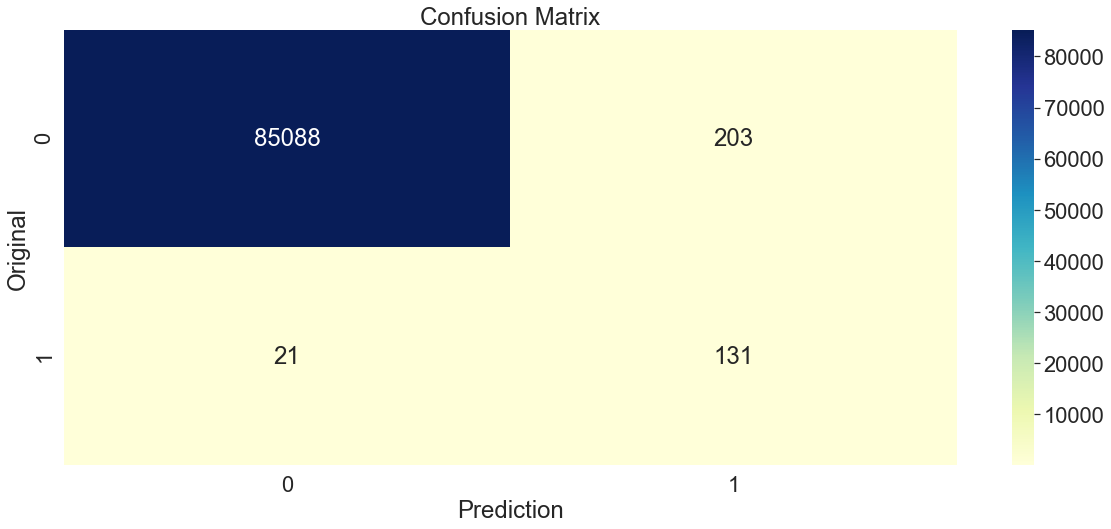

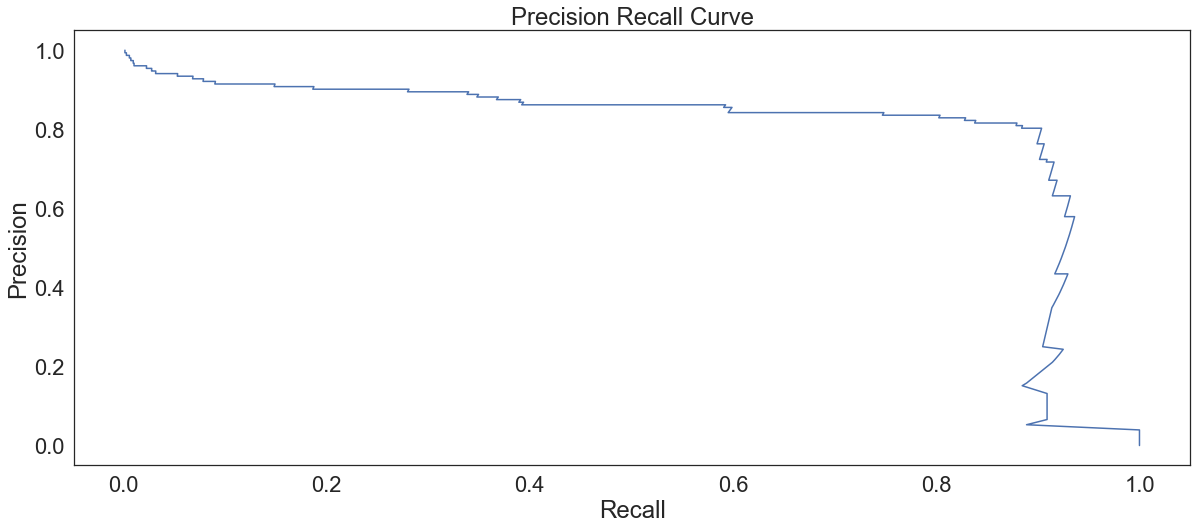

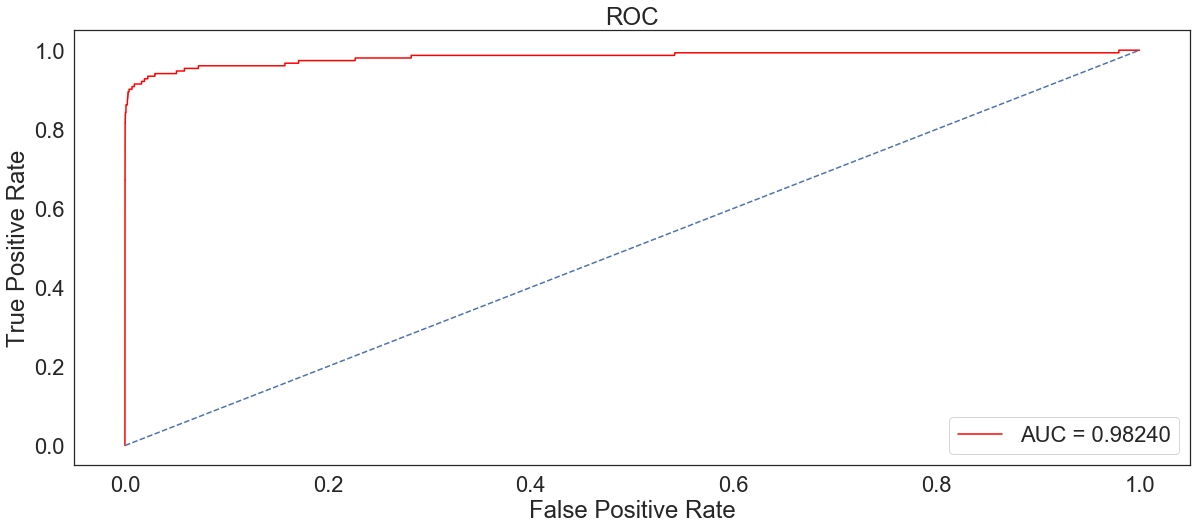

In [79]:
rf_smote = RandomForestClassifier(criterion= 'gini', max_depth=10, max_features='auto', n_estimators=10, random_state=3)
rf_smote.fit(X_train, y_train)
f1_rf_smote, auc_rf_smote= evaluation(rf_smote)

In [94]:
get_rf_importance(rf_smote)

Features Importance:
  Feature  Importance
5      V4    0.059110
2      V1    0.031673
4      V3    0.012894
9      V8    0.011816
8      V7    0.010327
1  Amount    0.009498
6      V5    0.009202
7      V6    0.006750
3      V2    0.005487
0    Time    0.004527


### 3- Logistic regression

In [81]:
param_grid = {
    'solver' : ['liblinear'],
    'penalty' : ['l1', 'l2']
}

logreg = LogisticRegression(random_state = 3)
grid_search = GSCV(estimator=logreg, param_grid=param_grid, cv=10, verbose=3 )
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
[CV 1/10] END .....penalty=l1, solver=liblinear;, score=0.949 total time=  44.6s
[CV 2/10] END .....penalty=l1, solver=liblinear;, score=0.948 total time= 1.1min
[CV 3/10] END .....penalty=l1, solver=liblinear;, score=0.949 total time=  55.0s
[CV 4/10] END .....penalty=l1, solver=liblinear;, score=0.948 total time= 1.1min
[CV 5/10] END .....penalty=l1, solver=liblinear;, score=0.949 total time= 1.1min
[CV 6/10] END .....penalty=l1, solver=liblinear;, score=0.945 total time=  47.0s
[CV 7/10] END .....penalty=l1, solver=liblinear;, score=0.948 total time=  49.2s
[CV 8/10] END .....penalty=l1, solver=liblinear;, score=0.951 total time= 1.2min
[CV 9/10] END .....penalty=l1, solver=liblinear;, score=0.948 total time=  55.1s
[CV 10/10] END ....penalty=l1, solver=liblinear;, score=0.948 total time=  31.2s
[CV 1/10] END .....penalty=l2, solver=liblinear;, score=0.949 total time=  41.6s
[CV 2/10] END .....penalty=l2, solver=liblinear;

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=3),
             param_grid={'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             verbose=3)

In [82]:
logreg_smote = grid_search.best_params_
logreg_smote

{'penalty': 'l2', 'solver': 'liblinear'}

******Evaluating Model**********

Accuracy: 0.975
Precision: 0.063
Recall: 0.934
F1-Score: 0.118


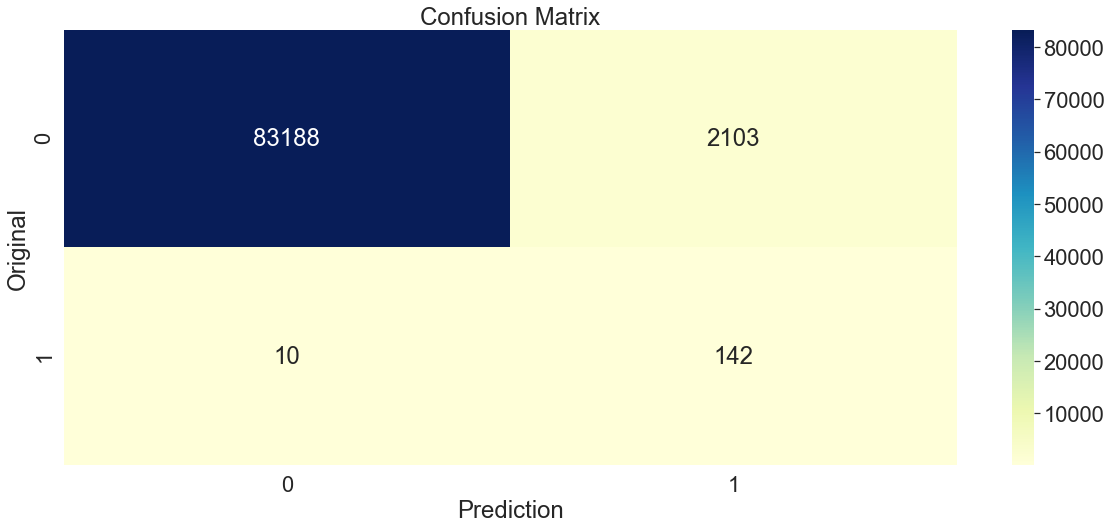

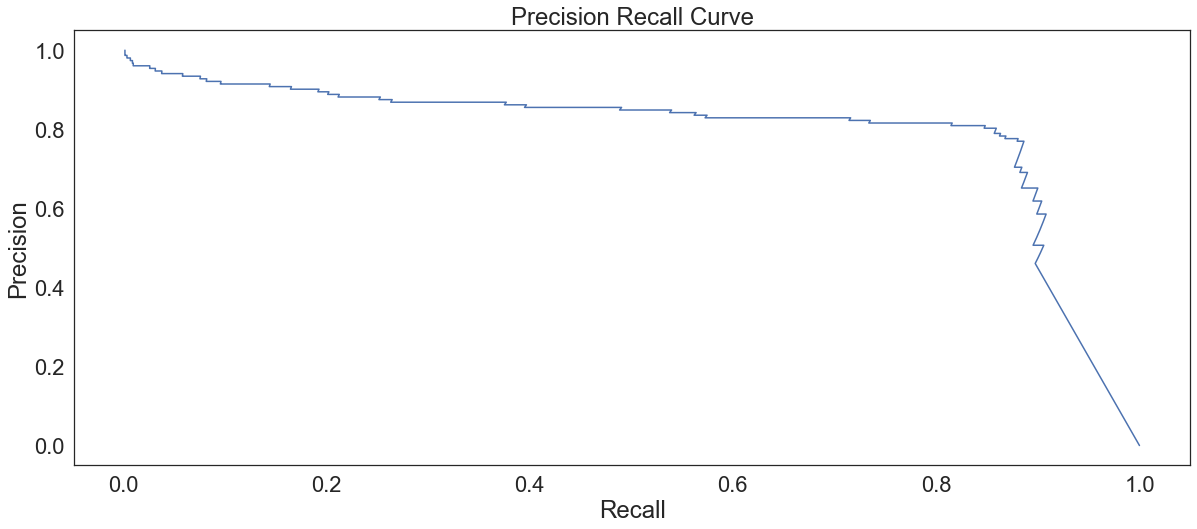

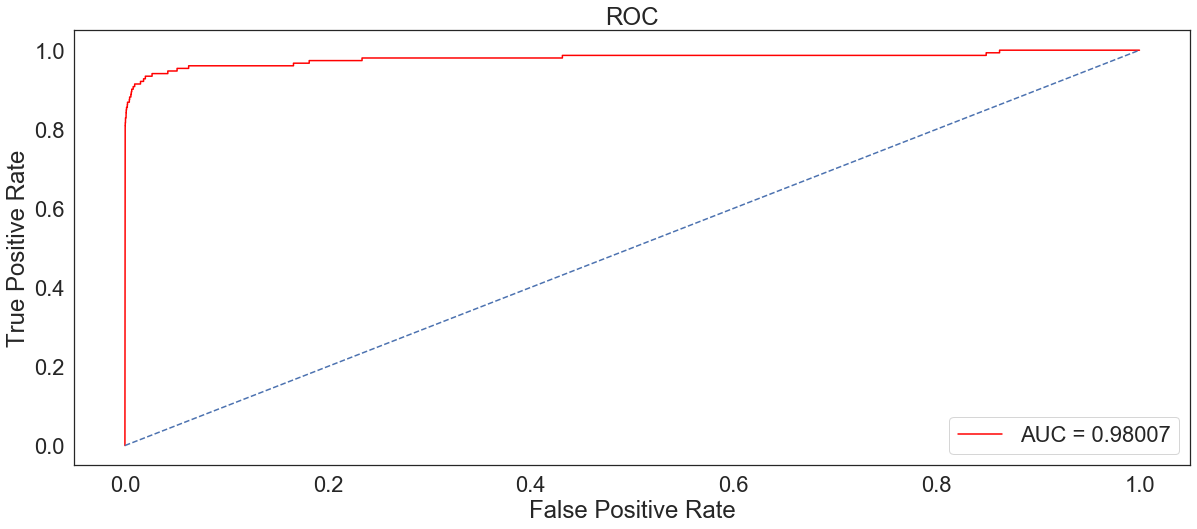

In [83]:
logreg_smote = LogisticRegression(solver = 'liblinear', penalty='l2', random_state=3) #best solver for our data (binairy and small)
logreg_smote.fit(X_train,y_train)
f1_logreg_smote, auc_logreg_smote = evaluation(logreg_smote)

In [106]:
get_log_function(logreg_smote)

Equation : 
   Variables  Coefficient
0       Time    -1.024306
1     Amount     0.717676
2         V1     0.707332
3         V2     1.127155
4         V3     0.350555
5         V4     1.244443
6         V5     1.323697
7         V6    -0.632842
8         V7    -0.292163
9         V8    -0.411455
10        V9     0.504464
11       V10    -1.532413
12       V11     0.655630
13       V12    -0.961557
14       V13    -0.679941
15       V14    -1.563061
16       V15     0.090728
17       V16     0.625621
18       V17    -1.379657
19       V18    -1.462464
20       V19     1.209841
21       V20    -0.584078
22       V21     0.411078
23       V22     1.459170
24       V23     0.533935
25       V24    -0.230233
26       V25     0.165441
27       V26    -0.395234
28       V27     0.136626
29       V28     0.741648
30  Constant    -5.079250


### 4- Neural Network (1*dense, Dorpout(0.5), EarlyStop)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                1984      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 4,130
Trainable params: 4,130
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1062/1062 [==============================] - 48s 36ms/step - loss: 0.3016 - accuracy: 0.8775 - val_loss: 0

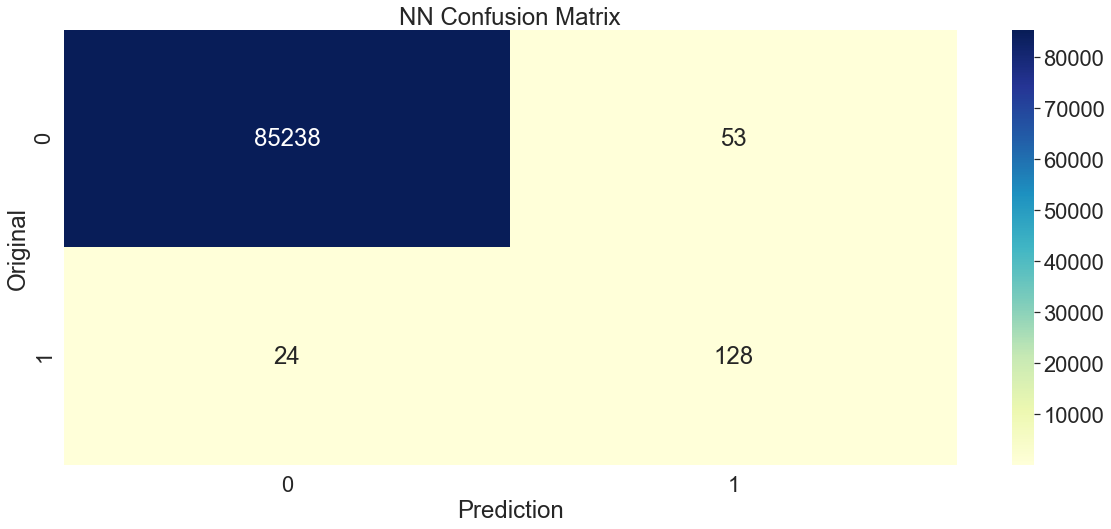

In [85]:
f1_nn_smote=neurnet_smote()

### 5- Bagging

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


******Evaluating Model**********

Accuracy: 0.983
Precision: 0.089
Recall: 0.908
F1-Score: 0.163


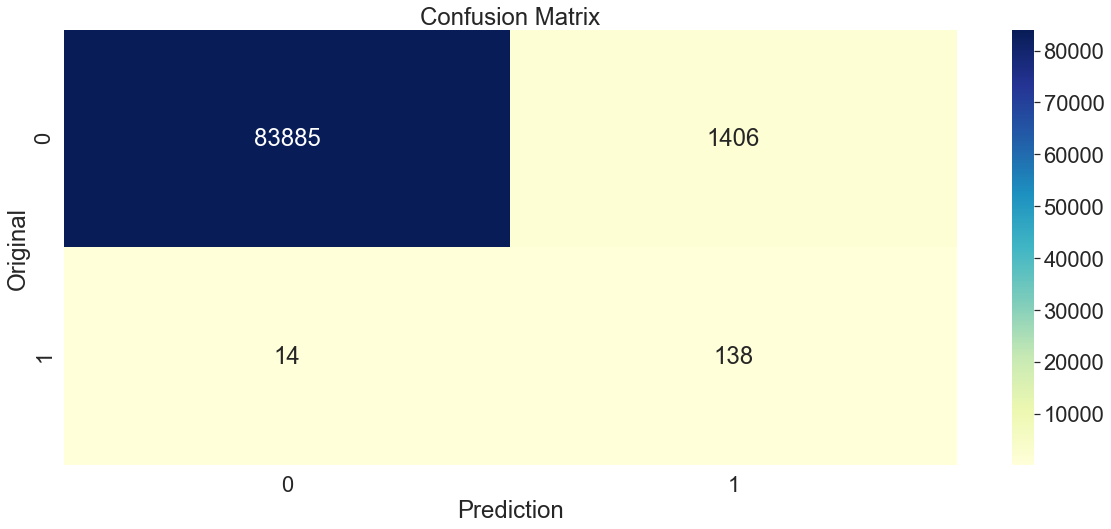

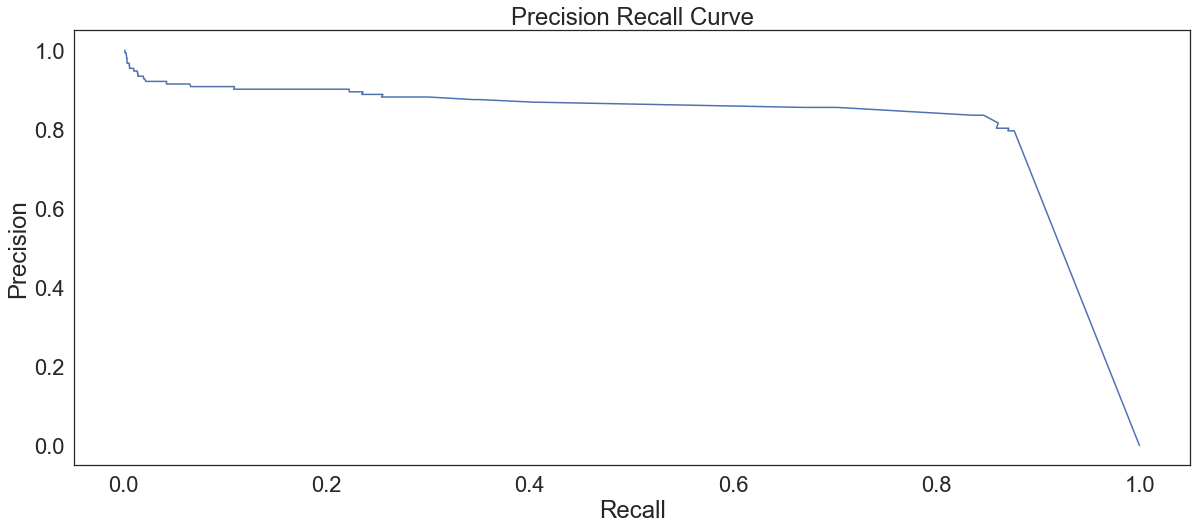

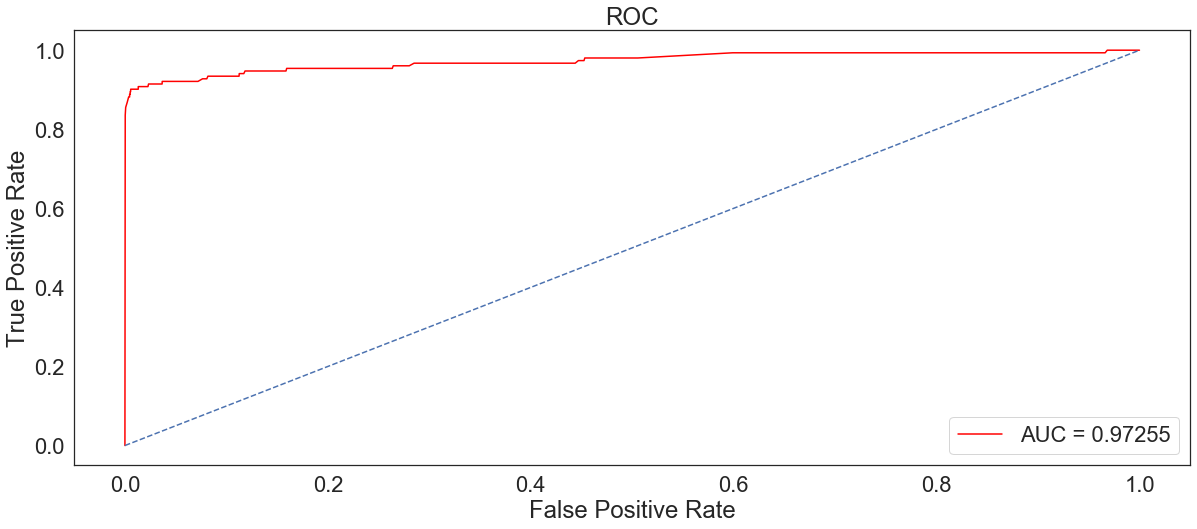

In [86]:
bc_smote = BaggingClassifier(dt_smote, oob_score=True, random_state = 3)
bc_smote.fit(X_train, y_train)
f1_bc_smote, auc_bc_smote = evaluation(bc_smote)

In [104]:
bc_smote.oob_score_

0.9760305289814294

### 7- Comparing models AFTER SMOTE

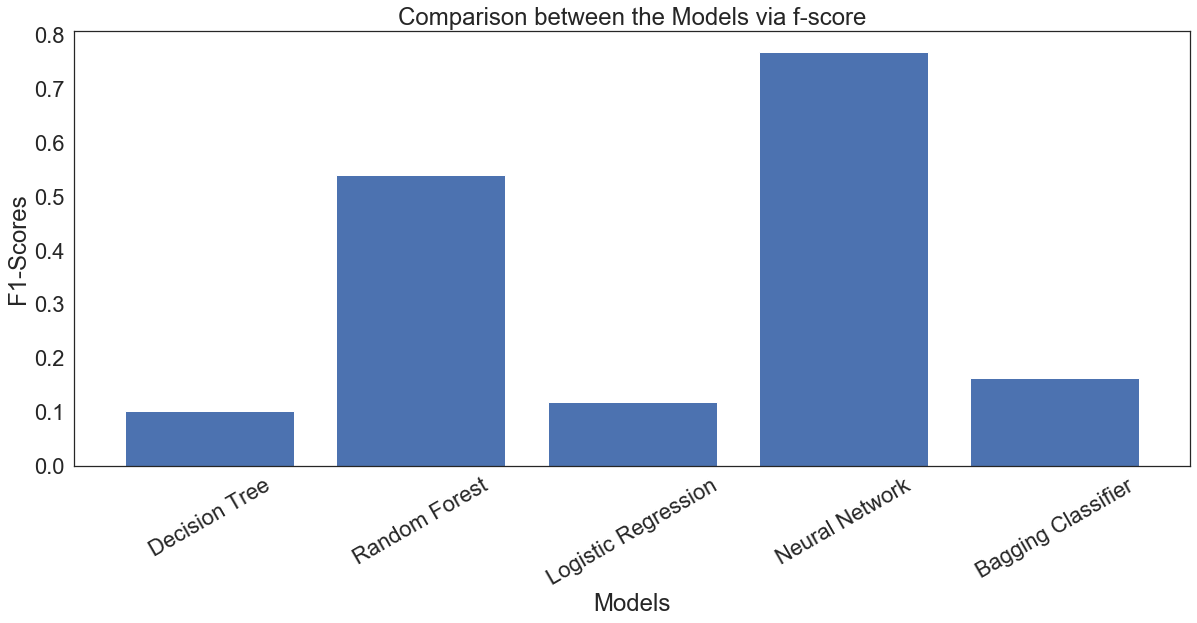

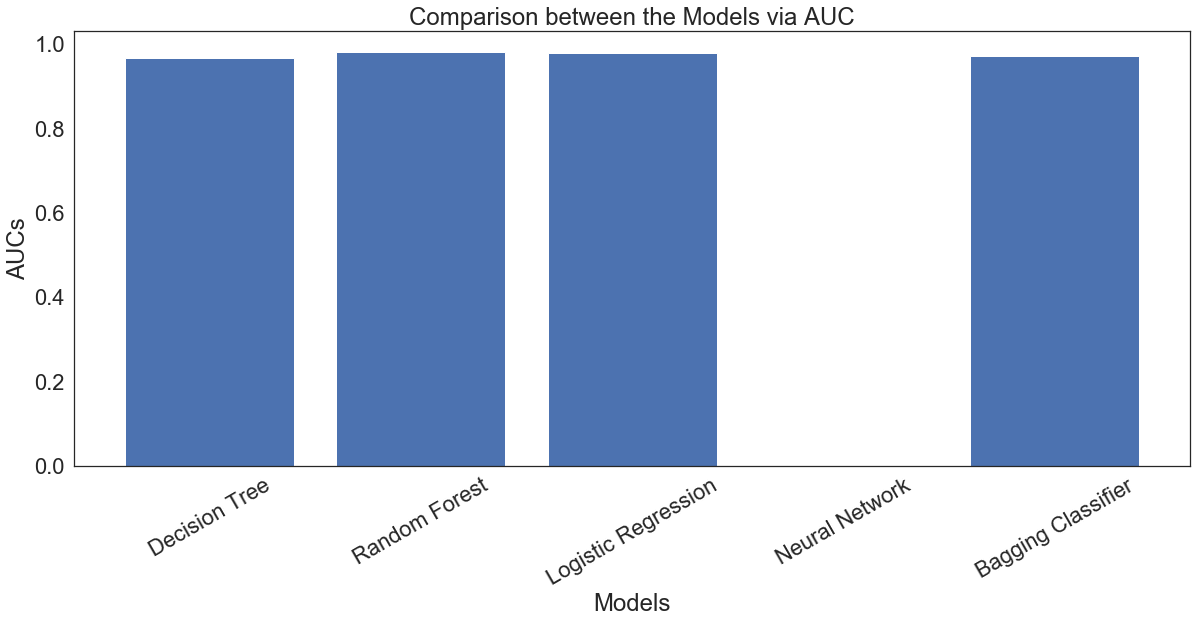

                 Model  F1-Score       AUC
3       Neural Network  0.768769       NaN
1        Random Forest  0.539095  0.982396
4   Bagging Classifier  0.162736  0.972546
2  Logistic Regression  0.118481  0.980075
0        Decision Tree  0.102450  0.965898
***************************************
-------------------------*********-----
----------------*********--------------
--------********-----------------------
********-------------------------------
***************************************
                 Model  F1-Score       AUC
1        Random Forest  0.539095  0.982396
2  Logistic Regression  0.118481  0.980075
4   Bagging Classifier  0.162736  0.972546
0        Decision Tree  0.102450  0.965898
3       Neural Network  0.768769       NaN


In [88]:
f1_smote=[f1_dt_smote, f1_rf_smote, f1_logreg_smote, f1_nn_smote, f1_bc_smote]

auc_smote=[auc_dt_smote, auc_rf_smote, auc_logreg_smote, None, auc_bc_smote]

Compare_my_models(f1_smote, auc_smote)

# SUMMARY FOR ALL CREATED MODELS

In [89]:
#compair all models

def Compare_All_models(l1, l2):
    res = pd.DataFrame({
        'Model' : ['Decision Tree Smote', 'Decision Tree NO-Smote',
                   'Random Forest Smote', 'Random Forest NO-Smote',
                   'Logistic Regression Smote', 'Logistic Regression NO-Smote',
                   'Neural Network Smote','Neural Network No-Smote',
                   'Bagging Classifier Smote', 'Bagging Classifier NO-Smote'],
        'F1-Score' : l1,
        'AUC': l2
    })
    
    plt.figure(figsize=(20,8))
    plt.bar(res['Model'], res['F1-Score'])
    plt.xlabel("Models")
    plt.ylabel("F1-Scores")
    plt.xticks(rotation = 30)
    plt.title("Comparison between the Models via f-score")
    plt.show()
    
    plt.figure(figsize=(20,8))
    plt.bar(res['Model'], res['AUC'])
    plt.xlabel("Models")
    plt.ylabel("AUCs")
    plt.xticks(rotation = 30)
    plt.title("Comparison between the Models via AUC")
    plt.show()
    
    print()
    print('-------SORTED MODELS BY F1-SCORE----------')
    print(res.sort_values(by='F1-Score', ascending=False))
    
    print('*******************************************')
    print('-------------------------*********---------')
    print('----------------*********------------------')
    print('--------********---------------------------')
    print('********-----------------------------------')
    print('********************************************')
    
    print()
    print('-----------SORTED MODELS BY AUC------------')
    print(res.sort_values(by='AUC', ascending=False))

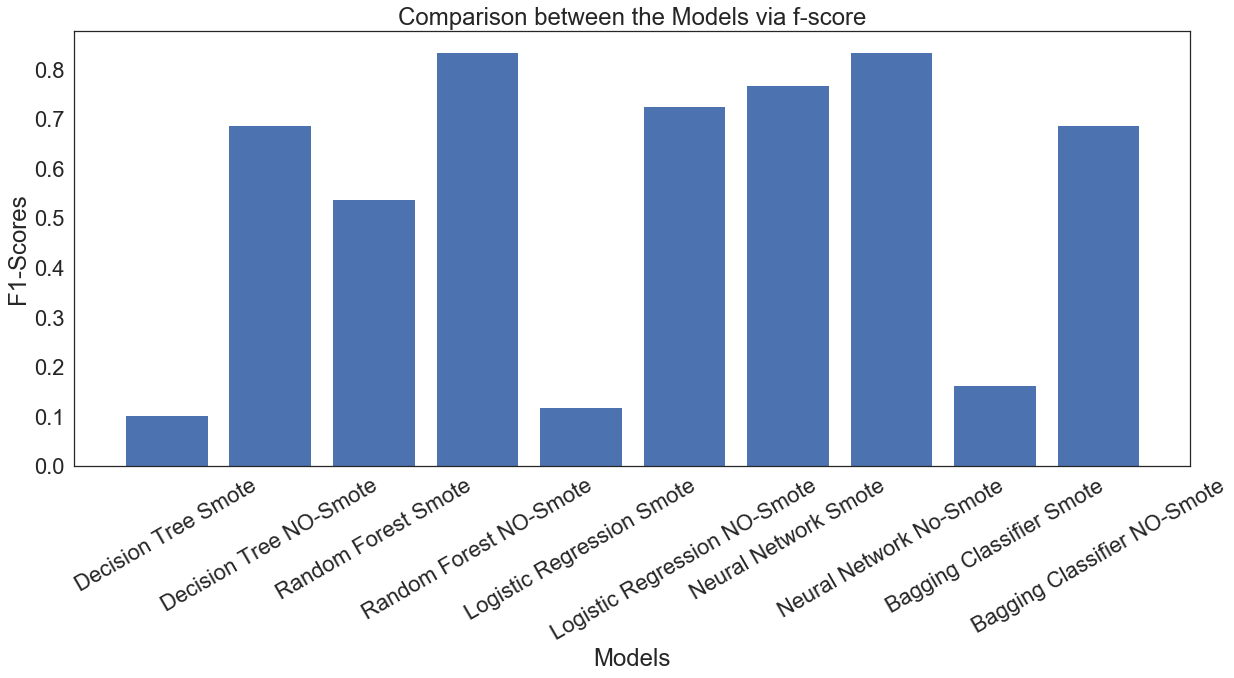

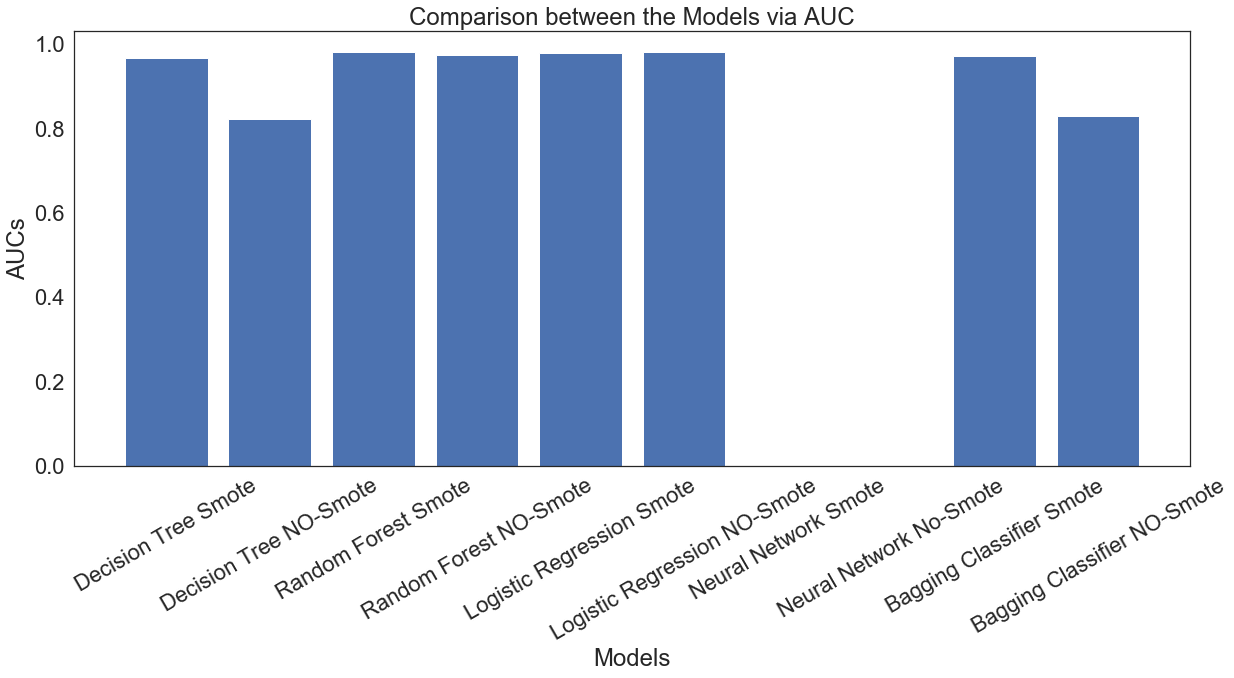


-------SORTED MODELS BY F1-SCORE----------
                          Model  F1-Score       AUC
3        Random Forest NO-Smote  0.836364  0.975021
7       Neural Network No-Smote  0.835616       NaN
6          Neural Network Smote  0.768769       NaN
5  Logistic Regression NO-Smote  0.725869  0.980323
1        Decision Tree NO-Smote  0.687719  0.822163
9   Bagging Classifier NO-Smote  0.687719  0.828738
2           Random Forest Smote  0.539095  0.982396
8      Bagging Classifier Smote  0.162736  0.972546
4     Logistic Regression Smote  0.118481  0.980075
0           Decision Tree Smote  0.102450  0.965898
*******************************************
-------------------------*********---------
----------------*********------------------
--------********---------------------------
********-----------------------------------
********************************************

-----------SORTED MODELS BY AUC------------
                          Model  F1-Score       AUC
2           Random For

In [90]:
l1_all=[f1_dt_smote, f1_dt_nosmote, f1_rf_smote, f1_rf_nosmote, f1_logreg_smote, f1_logreg_nosmote, f1_nn_smote, f1_nn_nosmote, f1_bc_smote, f1_bc_nosmote]
l2_all=[auc_dt_smote, auc_dt_nosmote, auc_rf_smote, auc_rf_nosmote, auc_logreg_smote, auc_logreg_nosmote, None, None, auc_bc_smote, auc_bc_nosmote]

Compare_All_models(l1_all, l2_all)